In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [94]:
#import library 
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from plotnine import *

## IMS - Table 1: International migrant stock at mid-year by sex and by major area, region, country or area, 1990-2015 

In [3]:
#loading the data
df_table_ims = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 1',skiprows=14, header=[0, 1] )
df_table_ims.head()

Sort\norder Major area, region, country or area of destination  \
  Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                  1                                              WORLD   
1                  2                                  Developed regions   
2                  3                                 Developing regions   
3                  4                          Least developed countries   
4                  5  Less developed regions excluding least develop...   

               Notes       Country code   Type of data (a)  \
  Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                NaN                900                NaN   
1                (b)                901                NaN   
2                (c)                902                NaN   
3                (d)                941                NaN   
4                NaN                934                NaN   

  International migrant stock at mid-year (both sexes)                        \
                                                  1990       1995       2000   
0                                          152563212    160801752  172703309   
1                                           82378628     92306854  103375363   
2                                           70184584     68494898   69327946   
3                                           11075966     11711703   10077824   
4                                           59105261     56778501   59244124   

                         ... International migrant stock at mid-year (male)  \
        2005       2010  ...                                           2000   
0  191269100  221714243  ...                                       87884839   
1  117181109  132560325  ...                                       50536796   
2   74087991   89153918  ...                                       37348043   
3    9809634   10018128  ...                                        5361902   
4   64272611   79130668  ...                                       31986141   

                                   \
       2005       2010       2015   
0  97866674  114613714  126115435   
1  57217777   64081077   67618619   
2  40648897   50532637   58496816   
3   5383009    5462714    6463217   
4  35265888   45069923   52033599   

  International migrant stock at mid-year (female)                      \
                                              1990      1995      2000   
0                                         74815702  79064275  84818470   
1                                         42115231  47214055  52838567   
2                                         32700471  31850220  31979903   
3                                          5236216   5573685   4721920   
4                                         27464255  26276535  27257983   

                                   
       2005       2010       2015  
0  93402426  107100529  117584801  
1  59963332   68479248   72863336  
2  33439094   38621281   44721465  
3   4432371    4560536    5493028  
4  29006723   34060745   39228437  

[5 rows x 23 columns]

In [4]:
# Clean the header
"""
Remove the brackets and quotes in the column names
use the regex if the column name ended with ", Unnamed: [0-9]_level_1"
replace it with empty string
"""
import re

df_table_ims.columns = [re.sub(", unnamed: [0-9]_level_1$", "","".join(str(col)).replace("(","").replace(")", "").replace("'","").lower()) for col in df_table_ims.columns]
df_table_ims.head(50)

sort\norder major area, region, country or area of destination notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
5             6                                 Sub-Saharan Africa   (e)   
6             7                                             Africa   NaN   
7             8                                     Eastern Africa   NaN   
8             9                                            Burundi   NaN   
9            10                                            Comoros   NaN   
10           11                                           Djibouti   NaN   
11           12                                            Eritrea   NaN   
12           13                                           Ethiopia   NaN   
13           14                                              Kenya   NaN   
14           15                                         Madagascar   NaN   
15           16                                             Malawi   NaN   
16           17                                          Mauritius   (1)   
17           18                                            Mayotte   NaN   
18           19                                         Mozambique   NaN   
19           20                                            Réunion   NaN   
20           21                                             Rwanda   NaN   
21           22                                         Seychelles   NaN   
22           23                                            Somalia   NaN   
23           24                                        South Sudan   NaN   
24           25                                             Uganda   NaN   
25           26                        United Republic of Tanzania   (2)   
26           27                                             Zambia   NaN   
27           28                                           Zimbabwe   NaN   
28           29                                      Middle Africa   NaN   
29           30                                             Angola   NaN   
30           31                                           Cameroon   NaN   
31           32                           Central African Republic   NaN   
32           33                                               Chad   NaN   
33           34                                              Congo   NaN   
34           35                   Democratic Republic of the Congo   NaN   
35           36                                  Equatorial Guinea   NaN   
36           37                                              Gabon   NaN   
37           38                              Sao Tome and Principe   NaN   
38           39                                    Northern Africa   NaN   
39           40                                            Algeria   NaN   
40           41                                              Egypt   NaN   
41           42                                              Libya   NaN   
42           43                                            Morocco   NaN   
43           44                                              Sudan   (3)   
44           45                                            Tunisia   NaN   
45           46                                     Western Sahara   NaN   
46           47                                    Southern Africa   NaN   
47           48                                           Botswana   NaN   
48           49                                            Lesotho   NaN   
49           50                                            Namibia   NaN   

    country code type of data a  \
0            900            NaN   
1            901            NaN   
2            902      

In [5]:
both_IMS_column = [df_table_ims.columns[i] for i in range(5, 11)]
male_IMS_column = [df_table_ims.columns[i] for i in range(11, 17)]
female_IMS_colum = [df_table_ims.columns[i] for i in range(17, 23)]

In [6]:
# Making year to colomun
df_IMS_both = df_table_ims.melt(id_vars = [df_table_ims.columns[i] for i in range(5)], value_vars = both_IMS_column, value_name = "ims_count")
df_IMS_male = df_table_ims.melt(id_vars = [df_table_ims.columns[i] for i in range(5)], value_vars = male_IMS_column, value_name = "ims_count")
df_IMS_female = df_table_ims.melt(id_vars = [df_table_ims.columns[i] for i in range(5)], value_vars = female_IMS_colum, value_name = "ims_count")

In [7]:
df_IMS_male.head()

sort\norder major area, region, country or area of destination notes  \
0            1                                              WORLD   NaN   
1            2                                  Developed regions   (b)   
2            3                                 Developing regions   (c)   
3            4                          Least developed countries   (d)   
4            5  Less developed regions excluding least develop...   NaN   

   country code type of data a  \
0           900            NaN   
1           901            NaN   
2           902            NaN   
3           941            NaN   
4           934            NaN   

                                            variable ims_count  
0  international migrant stock at mid-year male, ...  77747510  
1  international migrant stock at mid-year male, ...  40263397  
2  international migrant stock at mid-year male, ...  37484113  
3  international migrant stock at mid-year male, ...   5843107  
4  international migrant stock at mid-year male, ...  31641006

In [8]:
# Union male and female dataframe
df_IMS_male = pd.concat([df_IMS_male, df_IMS_both])
df_IMS = pd.concat([df_IMS_male, df_IMS_female]).rename(columns={"variable": "gender_year", "type of data a": "type_of_data", "country code": "geo_code"})
df_IMS.head()

sort\norder major area, region, country or area of destination notes  \
0            1                                              WORLD   NaN   
1            2                                  Developed regions   (b)   
2            3                                 Developing regions   (c)   
3            4                          Least developed countries   (d)   
4            5  Less developed regions excluding least develop...   NaN   

   geo_code type_of_data                                        gender_year  \
0       900          NaN  international migrant stock at mid-year male, ...   
1       901          NaN  international migrant stock at mid-year male, ...   
2       902          NaN  international migrant stock at mid-year male, ...   
3       941          NaN  international migrant stock at mid-year male, ...   
4       934          NaN  international migrant stock at mid-year male, ...   

  ims_count  
0  77747510  
1  40263397  
2  37484113  
3   5843107  
4  31641006

In [9]:
# Transform Gender column, if male in the field return male otherwise return female
def gender_transform(gender_year):
    """
    Take gender_year column as imput 
    if female is presented, return Female
    otherwise return Male
    """
    if "female" in gender_year:
        return "Female"
    elif "male" in gender_year:
        return "Male"
    else:
        return "Both"

In [10]:
df_IMS['gender'] = df_IMS.apply(lambda x: gender_transform(x['gender_year']), axis=1)
df_IMS.head()

sort\norder major area, region, country or area of destination notes  \
0            1                                              WORLD   NaN   
1            2                                  Developed regions   (b)   
2            3                                 Developing regions   (c)   
3            4                          Least developed countries   (d)   
4            5  Less developed regions excluding least develop...   NaN   

   geo_code type_of_data                                        gender_year  \
0       900          NaN  international migrant stock at mid-year male, ...   
1       901          NaN  international migrant stock at mid-year male, ...   
2       902          NaN  international migrant stock at mid-year male, ...   
3       941          NaN  international migrant stock at mid-year male, ...   
4       934          NaN  international migrant stock at mid-year male, ...   

  ims_count gender  
0  77747510   Male  
1  40263397   Male  
2  37484113   Male  
3   5843107   Male  
4  31641006   Male

In [11]:
df_IMS = df_IMS.assign(year = lambda x: x.gender_year.str[-4:].astype(str), ims_count = lambda x: x.ims_count.replace("..", np.nan)).drop("gender_year",axis=1)

In [12]:
# Table 1: International migrant stock at mid-year by sex and by major area, region, country or area, 1990-2015 
columns_to_keep_ims = ["geo_code", "year", "gender", "ims_count"]
df_table_1 = df_IMS[columns_to_keep_ims]
df_table_1.head()

geo_code  year gender   ims_count
0       900  1990   Male  77747510.0
1       901  1990   Male  40263397.0
2       902  1990   Male  37484113.0
3       941  1990   Male   5843107.0
4       934  1990   Male  31641006.0

## Population - Table 2： Total population at mid-year by sex and by major area, region, country or area, 1990-2015 (thousands)

In [13]:
#load in sheet 2 
df_table_pop = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 2',skiprows=14, header=[0, 1] )
df_table_pop.head()

Sort\norder Major area, region, country or area of destination  \
  Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                  1                                              WORLD   
1                  2                                  Developed regions   
2                  3                                 Developing regions   
3                  4                          Least developed countries   
4                  5  Less developed regions excluding least develop...   

               Notes       Country code  \
  Unnamed: 2_level_1 Unnamed: 3_level_1   
0                NaN                900   
1                (b)                901   
2                (c)                902   
3                (d)                941   
4                NaN                934   

  Total population of both sexes at mid-year (thousands)               \
                                                    1990         1995   
0                                        5309667.699      5735123.084   
1                                        1144463.062      1169761.211   
2                                        4165204.637      4565361.873   
3                                         510057.629       585189.354   
4                                        3655147.008      3980172.519   

                                                       ...  \
          2000         2005         2010         2015  ...   
0  6126622.121  6519635.850  6929725.043  7349472.099  ...   
1  1188811.731  1208919.509  1233375.711  1251351.086  ...   
2  4937810.390  5310716.341  5696349.332  6098121.013  ...   
3   664386.087   752804.951   847254.847   954157.804  ...   
4  4273424.303  4557911.390  4849094.485  5143963.209  ...   

  Total male population at mid-year (thousands)                            \
                                           2000         2005         2010   
0                                   3084537.662  3285082.249  3493956.904   
1                                    578010.218   587962.213   599955.476   
2                                   2506527.444  2697120.036  2894001.428   
3                                    331482.475   375757.715   422397.532   
4                                   2175044.969  2321362.321  2471603.896   

               Total female population at mid-year (thousands)               \
          2015                                            1990         1995   
0  3707205.753                                     2639243.998  2848487.191   
1   609297.148                                      589207.436   601492.755   
2  3097908.605                                     2050036.562  2246994.436   
3   476031.179                                      256015.073   293162.612   
4  2621877.426                                     1794021.489  1953831.824   

                                                       
          2000         2005         2010         2015  
0  3042084.459  3234553.601  3435768.139  3642266.346  
1   610801.513   620957.296   633420.235   642053.938  
2  2431282.946  2613596.305  2802347.904  3000212.408  
3   332903.612   377047.236   424857.315   478126.625  
4  2098379.334  2236549.069  2377490.589  2522085.783  

[5 rows x 22 columns]

In [14]:
# Clean the header
df_table_pop.columns = [re.sub(", unnamed: [0-9]_level_1$", "","".join(str(col)).replace("(","").replace(")", "").replace("'","").lower()) for col in df_table_pop.columns]
df_table_pop.head(50)

sort\norder major area, region, country or area of destination notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
5             6                                 Sub-Saharan Africa   (e)   
6             7                                             Africa   NaN   
7             8                                     Eastern Africa   NaN   
8             9                                            Burundi   NaN   
9            10                                            Comoros   NaN   
10           11                                           Djibouti   NaN   
11           12                                            Eritrea   NaN   
12           13                                           Ethiopia   NaN   
13           14                                              Kenya   NaN   
14           15                                         Madagascar   NaN   
15           16                                             Malawi   NaN   
16           17                                          Mauritius   (1)   
17           18                                            Mayotte   NaN   
18           19                                         Mozambique   NaN   
19           20                                            Réunion   NaN   
20           21                                             Rwanda   NaN   
21           22                                         Seychelles   NaN   
22           23                                            Somalia   NaN   
23           24                                        South Sudan   NaN   
24           25                                             Uganda   NaN   
25           26                        United Republic of Tanzania   (2)   
26           27                                             Zambia   NaN   
27           28                                           Zimbabwe   NaN   
28           29                                      Middle Africa   NaN   
29           30                                             Angola   NaN   
30           31                                           Cameroon   NaN   
31           32                           Central African Republic   NaN   
32           33                                               Chad   NaN   
33           34                                              Congo   NaN   
34           35                   Democratic Republic of the Congo   NaN   
35           36                                  Equatorial Guinea   NaN   
36           37                                              Gabon   NaN   
37           38                              Sao Tome and Principe   NaN   
38           39                                    Northern Africa   NaN   
39           40                                            Algeria   NaN   
40           41                                              Egypt   NaN   
41           42                                              Libya   NaN   
42           43                                            Morocco   NaN   
43           44                                              Sudan   (3)   
44           45                                            Tunisia   NaN   
45           46                                     Western Sahara   NaN   
46           47                                    Southern Africa   NaN   
47           48                                           Botswana   NaN   
48           49                                            Lesotho   NaN   
49           50                                            Namibia   NaN   

    country code  total population of both sexes at mid-year thousands, 1990  \
0            900                               

In [15]:
both_pop_column = [df_table_pop.columns[i] for i in range(4, 10)]
male_pop_column = [df_table_pop.columns[i] for i in range(10, 16)]
female_pop_colum = [df_table_pop.columns[i] for i in range(16, 22)]

In [16]:
# Making year to colomun
df_pop_both = df_table_pop.melt(id_vars = [df_table_pop.columns[i] for i in range(4)], value_vars = both_pop_column, value_name = "population")
df_pop_male = df_table_pop.melt(id_vars = [df_table_pop.columns[i] for i in range(4)], value_vars = male_pop_column, value_name = "population")
df_pop_female = df_table_pop.melt(id_vars = [df_table_pop.columns[i] for i in range(4)], value_vars = female_pop_colum, value_name = "population")

In [17]:
# Union male and female dataframe
df_pop_male = pd.concat([df_pop_male, df_pop_both])
df_pop = pd.concat([df_pop_male, df_pop_female]).rename(columns={"variable": "gender_year", "country code": "geo_code"})
df_pop.head()

sort\norder major area, region, country or area of destination notes  \
0            1                                              WORLD   NaN   
1            2                                  Developed regions   (b)   
2            3                                 Developing regions   (c)   
3            4                          Least developed countries   (d)   
4            5  Less developed regions excluding least develop...   NaN   

   geo_code                                        gender_year   population  
0       900  total male population at mid-year thousands, 1990  2670423.701  
1       901  total male population at mid-year thousands, 1990   555255.626  
2       902  total male population at mid-year thousands, 1990  2115168.075  
3       941  total male population at mid-year thousands, 1990   254042.556  
4       934  total male population at mid-year thousands, 1990  1861125.519

In [18]:
df_pop['gender'] = df_pop.apply(lambda x: gender_transform(x['gender_year']), axis=1)
df_pop

sort\norder major area, region, country or area of destination notes  \
0               1                                              WORLD   NaN   
1               2                                  Developed regions   (b)   
2               3                                 Developing regions   (c)   
3               4                          Least developed countries   (d)   
4               5  Less developed regions excluding least develop...   NaN   
...           ...                                                ...   ...   
1585          261                                              Samoa   NaN   
1586          262                                            Tokelau   NaN   
1587          263                                              Tonga   NaN   
1588          264                                             Tuvalu   NaN   
1589          265                          Wallis and Futuna Islands   NaN   

      geo_code                                        gender_year  \
0          900  total male population at mid-year thousands, 1990   
1          901  total male population at mid-year thousands, 1990   
2          902  total male population at mid-year thousands, 1990   
3          941  total male population at mid-year thousands, 1990   
4          934  total male population at mid-year thousands, 1990   
...        ...                                                ...   
1585       882  total female population at mid-year thousands,...   
1586       772  total female population at mid-year thousands,...   
1587       776  total female population at mid-year thousands,...   
1588       798  total female population at mid-year thousands,...   
1589       876  total female population at mid-year thousands,...   

       population  gender  
0     2670423.701    Male  
1      555255.626    Male  
2     2115168.075    Male  
3      254042.556    Male  
4     1861125.519    Male  
...           ...     ...  
1585       93.584  Female  
1586           ..  Female  
1587       52.931  Female  
1588           ..  Female  
1589           ..  Female  

[4770 rows x 7 columns]

In [19]:
df_pop = df_pop.assign(year = lambda x: x.gender_year.str[-4:].astype(str), population = lambda x: x.population.replace("..", np.nan).astype(float)).drop("gender_year",axis=1)
df_pop

sort\norder major area, region, country or area of destination notes  \
0               1                                              WORLD   NaN   
1               2                                  Developed regions   (b)   
2               3                                 Developing regions   (c)   
3               4                          Least developed countries   (d)   
4               5  Less developed regions excluding least develop...   NaN   
...           ...                                                ...   ...   
1585          261                                              Samoa   NaN   
1586          262                                            Tokelau   NaN   
1587          263                                              Tonga   NaN   
1588          264                                             Tuvalu   NaN   
1589          265                          Wallis and Futuna Islands   NaN   

      geo_code   population  gender  year  
0          900  2670423.701    Male  1990  
1          901   555255.626    Male  1990  
2          902  2115168.075    Male  1990  
3          941   254042.556    Male  1990  
4          934  1861125.519    Male  1990  
...        ...          ...     ...   ...  
1585       882       93.584  Female  2015  
1586       772          NaN  Female  2015  
1587       776       52.931  Female  2015  
1588       798          NaN  Female  2015  
1589       876          NaN  Female  2015  

[4770 rows x 7 columns]

In [20]:
# Table 2: Total population at mid-year by sex and by major area, region, country or area, 1990-2015 (thousands)
columns_to_keep_pop = ["geo_code", "year", "gender", "population"]
df_table_2 = df_pop[columns_to_keep_pop]
df_table_2["population"] = df_table_2["population"]*1000
df_table_2

C:\Users\Shaozhu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


geo_code  year  gender    population
0          900  1990    Male  2.670424e+09
1          901  1990    Male  5.552556e+08
2          902  1990    Male  2.115168e+09
3          941  1990    Male  2.540426e+08
4          934  1990    Male  1.861126e+09
...        ...   ...     ...           ...
1585       882  2015  Female  9.358400e+04
1586       772  2015  Female           NaN
1587       776  2015  Female  5.293100e+04
1588       798  2015  Female           NaN
1589       876  2015  Female           NaN

[4770 rows x 4 columns]

##  Refugee - Table 3, 4 and 5
* Table 3: Estimated refugee stock at mid-year by major area, region, country or area, 1990-2015
* Table 4: Estimated refugee stock as a percentage of the international migrant stock at mid-year by major area, region, country or area, 1990-2015
* Table 5: Annual rate of change of the refugee stock and by major area, region, country or area, 1990-2015

In [21]:
#loading the data
df_table_refugee = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 6',skiprows=14, header=[0,1])
df_table_refugee.head()

Sort\norder Major area, region, country or area of destination  \
  Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                  1                                              WORLD   
1                  2                                  Developed regions   
2                  3                                 Developing regions   
3                  4                          Least developed countries   
4                  5  Less developed regions excluding least develop...   

               Notes       Country code   Type of data (a)  \
  Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                NaN                900                NaN   
1                (b)                901                NaN   
2                (c)                902                NaN   
3                (d)                941                NaN   
4                NaN                934                NaN   

  Estimated refugee stock at mid-year (both sexes)                      \
                                              1990      1995      2000   
0                                         18836571  17853840  15827803   
1                                          2014564   3609670   2997256   
2                                         16822007  14244170  12830547   
3                                          5048391   5160131   3047488   
4                                         11773616   9084039   9783059   

                       ...  \
       2005      2010  ...   
0  13276733  15370755  ...   
1   2361229   2046917  ...   
2  10915504  13323838  ...   
3   2363782   1957884  ...   
4   8551722  11365954  ...   

  Refugees as a percentage of the international migrant stock             \
                                                         1995       2000   
0                                          11.103013            9.164736   
1                                           3.910511            2.899391   
2                                          20.795958           18.507035   
3                                          44.041961           30.221557   
4                                          15.999082            16.51313   

                                   Annual rate of change of the refugee stock  \
        2005       2010       2015                                  1990-1995   
0   6.941389   6.932687   8.033424                                  -2.123497   
1   2.015025   1.544140   1.391085                                   9.388424   
2  14.733162  14.944759  17.073768                                  -2.839417   
3   24.08243  19.533425  28.801534                                  -0.680327   
4  13.305391  14.363526  15.537313                                    -4.3836   

                                           
  1995-2000 2000-2005 2005-2010 2010-2015  
0 -3.837069 -5.557223 -0.025089  2.947267  
1 -5.983348 -7.277379 -5.323293 -2.087656  
2 -2.332154    -4.561  0.285195  2.663652  
3 -7.531747 -4.541459 -4.187109  7.766031  
4  0.632489 -4.319731  1.530456  1.571047  

[5 rows x 22 columns]

In [22]:
df_table_refugee.columns = [re.sub(", unnamed: [0-9]_level_1$", "","".join(str(col)).replace("(","").replace(")", "").replace("'","").lower()) for col in df_table_refugee.columns]
df_table_refugee.head()

sort\norder major area, region, country or area of destination notes  \
0            1                                              WORLD   NaN   
1            2                                  Developed regions   (b)   
2            3                                 Developing regions   (c)   
3            4                          Least developed countries   (d)   
4            5  Less developed regions excluding least develop...   NaN   

   country code type of data a  \
0           900            NaN   
1           901            NaN   
2           902            NaN   
3           941            NaN   
4           934            NaN   

  estimated refugee stock at mid-year both sexes, 1990  \
0                                           18836571     
1                                            2014564     
2                                           16822007     
3                                            5048391     
4                                           11773616     

  estimated refugee stock at mid-year both sexes, 1995  \
0                                           17853840     
1                                            3609670     
2                                           14244170     
3                                            5160131     
4                                            9084039     

  estimated refugee stock at mid-year both sexes, 2000  \
0                                           15827803     
1                                            2997256     
2                                           12830547     
3                                            3047488     
4                                            9783059     

  estimated refugee stock at mid-year both sexes, 2005  \
0                                           13276733     
1                                            2361229     
2                                           10915504     
3                                            2363782     
4                                            8551722     

   estimated refugee stock at mid-year both sexes, 2010  ...  \
0                                           15370755     ...   
1                                            2046917     ...   
2                                           13323838     ...   
3                                            1957884     ...   
4                                           11365954     ...   

   refugees as a percentage of the international migrant stock, 1995  \
0                                          11.103013                   
1                                           3.910511                   
2                                          20.795958                   
3                                          44.041961                   
4                                          15.999082                   

  refugees as a percentage of the international migrant stock, 2000  \
0                                           9.164736                  
1                                           2.899391                  
2                                          18.507035                  
3                                          30.221557                  
4                                           16.51313                  

  refugees as a percentage of the international migrant stock, 2005  \
0                                           6.941389                  
1                                           2.015025                  
2                                          14.733162                  
3                                           24.08243                  
4                                          13.305391                  

  refugees as a percentage of the international migrant stock, 2010  \
0                                           6.932687                  
1                                           1.544140                  
2                                          14.944759              

In [23]:
refugee_count_column = [df_table_refugee.columns[i] for i in range(5, 11)]
refugee_percentage_column = [df_table_refugee.columns[i] for i in range(11, 17)]
refugee_annualrate_column = [df_table_refugee.columns[i] for i in range(17, 22)]

In [24]:
# Making year to colomun
df_table_3 = df_table_refugee.melt(id_vars = [df_table_refugee.columns[i] for i in range(5)], value_vars = refugee_count_column, value_name = "refugee_count")
df_table_4 = df_table_refugee.melt(id_vars = [df_table_refugee.columns[i] for i in range(5)], value_vars = refugee_percentage_column, value_name = "refugee_percentage")
df_table_5 = df_table_refugee.melt(id_vars = [df_table_refugee.columns[i] for i in range(5)], value_vars = refugee_annualrate_column, value_name = "refugee_annual_rate_change")

In [25]:
# Table 3: Estimated refugee stock at mid-year by major area, region, country or area, 1990-2015
df_table_3 = df_table_3.assign(year = lambda x: x.variable.str[-4:].astype(str), refugee_count = lambda x: x.refugee_count.replace("..", 0)).drop("variable",axis=1).rename(columns={"country code": "geo_code"})
df_table_3 = df_table_3[["geo_code", "year", "refugee_count"]]
df_table_3.head()

geo_code  year  refugee_count
0       900  1990       18836571
1       901  1990        2014564
2       902  1990       16822007
3       941  1990        5048391
4       934  1990       11773616

In [26]:
# Table 4: Estimated refugee stock as a percentage of the international migrant stock at mid-year by major area, region, country or area, 1990-2015
df_table_4 = df_table_4.assign(year = lambda x: x.variable.str[-4:].astype(str)).drop("variable",axis=1).rename(columns={"country code": "geo_code"})
df_table_4 = df_table_4[["geo_code", "year", "refugee_percentage"]]
df_table_4.head()

geo_code  year refugee_percentage
0       900  1990          12.346732
1       901  1990           2.445494
2       902  1990          23.968236
3       941  1990           45.56588
4       934  1990          19.919743

In [27]:
# Table 5: Annual rate of change of the refugee stock and by major area, region, country or area, 1990-2015
df_table_5 = df_table_5.assign(period = lambda x: x.variable.str[-9:].astype(str)).drop("variable",axis=1).rename(columns={"country code": "geo_code"})
df_table_5 = df_table_5[["geo_code", "period", "refugee_annual_rate_change"]]
df_table_5.head()

geo_code     period refugee_annual_rate_change
0       900  1990-1995                  -2.123497
1       901  1990-1995                   9.388424
2       902  1990-1995                  -2.839417
3       941  1990-1995                  -0.680327
4       934  1990-1995                    -4.3836

## Geo code to type of data - Table 6: Type of data for estimated refugee stock and international migrant stock 

In [28]:
df_table_code_type_data_mapping = df_IMS.loc[:, ["geo_code", "type_of_data"]]\
                                        .dropna(subset=['type_of_data'])\
                                        .drop_duplicates()
df_table_code_type_data_mapping

geo_code type_of_data
8         108          B R
9         174            B
10        262          B R
11        232            I
12        231          B R
..        ...          ...
260       882            B
261       772            B
262       776            B
263       798            C
264       876            B

[232 rows x 2 columns]

In [29]:
def convert_string_to_list(type_of_data):
    return type_of_data.split(" ")

In [30]:
df_table_code_type_data_mapping['type'] = df_table_code_type_data_mapping.apply(lambda row: convert_string_to_list(row['type_of_data']), axis=1)
df_table_code_type_data_mapping

geo_code type_of_data    type
8         108          B R  [B, R]
9         174            B     [B]
10        262          B R  [B, R]
11        232            I     [I]
12        231          B R  [B, R]
..        ...          ...     ...
260       882            B     [B]
261       772            B     [B]
262       776            B     [B]
263       798            C     [C]
264       876            B     [B]

[232 rows x 3 columns]

In [31]:
df_table_code_type_data_mapping = df_table_code_type_data_mapping.explode("type").reset_index().drop(["index","type_of_data"], axis=1)
df_table_code_type_data_mapping.head(10)

geo_code type
0       108    B
1       108    R
2       174    B
3       262    B
4       262    R
5       232    I
6       231    B
7       231    R
8       404    B
9       404    R

In [32]:
type_of_data = {'type':['B', 'C', 'R', 'I'],
                'description':["whether the data used to produce the estimates refer to the foreign-born population", 
                               "whether the data used to produce the estimates refer to foreign citizens", 
                               "It also indicates in which cases the number of refugees, as reported by UNHCR, were added to the estimate of international migrants",
                               "Estimates for countries or areas having no data on the number of international migrants were obtained by imputation indicated by"]}

df_type_of_data = pd.DataFrame(type_of_data)
df_type_of_data

type                                        description
0    B  whether the data used to produce the estimates...
1    C  whether the data used to produce the estimates...
2    R  It also indicates in which cases the number of...
3    I  Estimates for countries or areas having no dat...

In [33]:
# Table 6: Type of data for estimated refugee stock and international migrant stock 
df_table_6 = pd.merge(df_table_code_type_data_mapping, df_type_of_data, on=["type"], how="inner")
df_table_6

geo_code type                                        description
0         108    B  whether the data used to produce the estimates...
1         174    B  whether the data used to produce the estimates...
2         262    B  whether the data used to produce the estimates...
3         231    B  whether the data used to produce the estimates...
4         404    B  whether the data used to produce the estimates...
..        ...  ...                                                ...
299       136    C  whether the data used to produce the estimates...
300       740    C  whether the data used to produce the estimates...
301       598    C  whether the data used to produce the estimates...
302       520    C  whether the data used to produce the estimates...
303       798    C  whether the data used to produce the estimates...

[304 rows x 3 columns]

## Country Table 7 and 8
* Table 7: Name of Major area, region, country or area of destination and its corresponding Geo_Code
* Table 8: Country code showing the classification of countries and areas by major area and region

In [34]:
#loading the data
df_table_annex = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='ANNEX',skiprows=14, header=0)
df_table_annex.head()

Country code Country or area  Sort order Major area  Code  Sort order.1  \
0             4     Afghanistan          99       Asia   935            71   
1             8         Albania         154     Europe   908           127   
2            12         Algeria          40     Africa   903             7   
3            16  American Samoa         257    Oceania   909           238   
4            20         Andorra         155     Europe   908           127   

            Region  Code.1  Sort order.2 Developed region  \
0    Southern Asia    5501            98               No   
1  Southern Europe     925           153              Yes   
2  Northern Africa     912            39               No   
3        Polynesia     957           256               No   
4  Southern Europe     925           153              Yes   

  Least developed country Sub-Saharan Africa  
0                     Yes                 No  
1                      No                 No  
2                      No                 No  
3                      No                 No  
4                      No                 No

In [35]:
df_table_annex.columns = [col.replace(" ", "_").lower() for col in df_table_annex.columns]
df_table_annex = df_table_annex.rename(columns={"code": "area_code", "code.1": "region_code"})
df_table_annex.head()

country_code country_or_area  sort_order major_area  area_code  \
0             4     Afghanistan          99       Asia        935   
1             8         Albania         154     Europe        908   
2            12         Algeria          40     Africa        903   
3            16  American Samoa         257    Oceania        909   
4            20         Andorra         155     Europe        908   

   sort_order.1           region  region_code  sort_order.2 developed_region  \
0            71    Southern Asia         5501            98               No   
1           127  Southern Europe          925           153              Yes   
2             7  Northern Africa          912            39               No   
3           238        Polynesia          957           256               No   
4           127  Southern Europe          925           153              Yes   

  least_developed_country sub-saharan_africa  
0                     Yes                 No  
1                      No                 No  
2                      No                 No  
3                      No                 No  
4                      No                 No

In [36]:
# Table 7: Name of Major area, region, country or area of destination and its corresponding Geo_Code
df_table_7 = pd.concat([df_table_annex[["country_code", "country_or_area"]].rename(columns={"country_code": "geo_code", "country_or_area": "geo_definition"}),\
                             df_table_annex[["area_code", "major_area"]].rename(columns={"area_code": "geo_code", "major_area": "geo_definition"}),\
                             df_table_annex[["region_code", "region"]].rename(columns={"region_code": "geo_code", "region": "geo_definition"})
                            ])
df_table_7.head()

geo_code  geo_definition
0         4     Afghanistan
1         8         Albania
2        12         Algeria
3        16  American Samoa
4        20         Andorra

In [37]:
# Table 8: Country code showing the classification of countries and areas by major area and region
columns_to_keep_annex = ["country_code", "area_code", "region_code", "developed_region", "least_developed_country", "sub-saharan_africa"]
df_table_8 = df_table_annex[columns_to_keep_annex]
df_table_8

country_code  area_code  region_code developed_region  \
0               4        935         5501               No   
1               8        908          925              Yes   
2              12        903          912               No   
3              16        909          957               No   
4              20        908          925              Yes   
..            ...        ...          ...              ...   
227           876        909          957               No   
228           732        903          912               No   
229           887        935          922               No   
230           894        903          910               No   
231           716        903          910               No   

    least_developed_country sub-saharan_africa  
0                       Yes                 No  
1                        No                 No  
2                        No                 No  
3                        No                 No  
4                        No                 No  
..                      ...                ...  
227                      No                 No  
228                      No                 No  
229                     Yes                 No  
230                     Yes                Yes  
231                      No                Yes  

[232 rows x 6 columns]

## Note - Table 9

In [38]:
df_table_note = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='NOTES',skiprows=14).rename(columns={"NOTES": "note_id", "Unnamed: 1": "note"})
df_table_note.head()

note_id                                               note
0     (a)  The column labeled “Type of data” indicates wh...
1     (b)  More developed regions comprise Europe, Northe...
2     (c)  Less developed regions comprise all regions of...
3     (d)  The least developed countries, as defined by t...
4     (e)  Sub-Saharan Africa refers to all of Africa exc...

In [39]:
#note (a) will be converted to the Type of Data table 
df_table_note = df_table_note.iloc[1:,]
df_table_note.head()

note_id                                               note
1     (b)  More developed regions comprise Europe, Northe...
2     (c)  Less developed regions comprise all regions of...
3     (d)  The least developed countries, as defined by t...
4     (e)  Sub-Saharan Africa refers to all of Africa exc...
5     (1)    Including Agalega, Rodrigues and Saint Brandon.

In [40]:
def remove_parenthesis(note_id):
    return note_id.replace("(","").replace(")","")

In [41]:
df_table_note['note_id'] = df_table_note.apply(lambda row: remove_parenthesis(row['note_id']), axis=1)
df_table_note

note_id                                               note
1        b  More developed regions comprise Europe, Northe...
2        c  Less developed regions comprise all regions of...
3        d  The least developed countries, as defined by t...
4        e  Sub-Saharan Africa refers to all of Africa exc...
5        1    Including Agalega, Rodrigues and Saint Brandon.
6        2                                Including Zanzibar.
7        3  The estimates for 1990 to 2005 refer to Sudan ...
8        4          Including Ascension and Tristan da Cunha.
9        5  For statistical purposes, the data for China d...
10       6  As of 1 July 1997, Hong Kong became a Special ...
11       7  As of 20 December 1999, Macao became a Special...
12       8                       Including Sabah and Sarawak.
13       9                        Including Nagorno-Karabakh.
14      10                         Including Northern-Cyprus.
15      11              Including Abkhazia and South Ossetia.
16      12  Including East Jerusalem. Refugees are not par...
17      13                            Including Transnistria.
18      14                    Refers to Guernsey, and Jersey.
19      15                           Including Åland Islands.
20      16          Including Svalbard and Jan Mayen Islands.
21      17                  Refers to the Vatican City State.
22      18  Including Kosovo. The estimates for 1990 and 2...
23      19       Including Canary Islands, Ceuta and Melilla.
24      20  The estimates for 1990 to 2005 refer to the fo...
25      21  Including Saint-Barthélemy and Saint-Martin (F...
26      22  Including Christmas Island, Cocos (Keeling) Is...

In [42]:
df_table_code_note_mapping = df_IMS.loc[:, ["geo_code", "notes"]]
df_table_code_note_mapping = df_table_code_note_mapping.dropna(subset=['notes'])
df_table_code_note_mapping['note_id'] = df_table_code_note_mapping.apply(lambda x: remove_parenthesis(x['notes']), axis=1)
df_table_code_note_mapping = df_table_code_note_mapping.reset_index().drop(["notes", "index"], axis=1).drop_duplicates()
df_table_code_note_mapping

geo_code note_id
0        901       b
1        902       c
2        941       d
3        947       e
4        480       1
5        834       2
6        729       3
7        654       4
8        156       5
9        344       6
10       446       7
11       458       8
12        31       9
13       196      10
14       268      11
15       275      12
16       498      13
17       830      14
18       246      15
19       578      16
20       336      17
21       688      18
22       724      19
23       535      20
24       312      21
25        36      22

In [43]:
# Table 9: Notes by geo_code
df_table_9 = pd.merge(df_table_code_note_mapping, df_table_note, on=["note_id"], how="inner").drop("note_id",axis=1)
df_table_9

geo_code                                               note
0        901  More developed regions comprise Europe, Northe...
1        902  Less developed regions comprise all regions of...
2        941  The least developed countries, as defined by t...
3        947  Sub-Saharan Africa refers to all of Africa exc...
4        480    Including Agalega, Rodrigues and Saint Brandon.
5        834                                Including Zanzibar.
6        729  The estimates for 1990 to 2005 refer to Sudan ...
7        654          Including Ascension and Tristan da Cunha.
8        156  For statistical purposes, the data for China d...
9        344  As of 1 July 1997, Hong Kong became a Special ...
10       446  As of 20 December 1999, Macao became a Special...
11       458                       Including Sabah and Sarawak.
12        31                        Including Nagorno-Karabakh.
13       196                         Including Northern-Cyprus.
14       268              Including Abkhazia and South Ossetia.
15       275  Including East Jerusalem. Refugees are not par...
16       498                            Including Transnistria.
17       830                    Refers to Guernsey, and Jersey.
18       246                           Including Åland Islands.
19       578          Including Svalbard and Jan Mayen Islands.
20       336                  Refers to the Vatican City State.
21       688  Including Kosovo. The estimates for 1990 and 2...
22       724       Including Canary Islands, Ceuta and Melilla.
23       535  The estimates for 1990 to 2005 refer to the fo...
24       312  Including Saint-Barthélemy and Saint-Martin (F...
25        36  Including Christmas Island, Cocos (Keeling) Is...

In [44]:
#loading the data
df_table_female_pertange = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 4',skiprows=14, header=[0,1])
df_table_female_pertange.head()

Sort\norder Major area, region, country or area of destination  \
  Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                  1                                              WORLD   
1                  2                                  Developed regions   
2                  3                                 Developing regions   
3                  4                          Least developed countries   
4                  5  Less developed regions excluding least develop...   

               Notes       Country code   Type of data (a)  \
  Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                NaN                900                NaN   
1                (b)                901                NaN   
2                (c)                902                NaN   
3                (d)                941                NaN   
4                NaN                934                NaN   

  Female migrants as a percentage of the international migrant stock  \
                                                                1990   
0                                           49.03915                   
1                                          51.123977                   
2                                          46.592099                   
3                                          47.261155                   
4                                          46.466684                   

                                                          
        1995       2000       2005       2010       2015  
0   49.16879  49.112244  48.832993  48.305660  48.249769  
1  51.149024  51.113307  51.171501  51.658932  51.866687  
2  46.500135  46.128444  45.134297  43.319780  43.327078  
3  47.571664  46.826689  45.157406  45.499573  45.942752  
4  46.279022  46.009598  45.130768  43.043672  42.984398

In [45]:
df_table_female_pertange.columns = [re.sub(", unnamed: [0-9]_level_1$", "","".join(str(col)).replace("(","").replace(")", "").replace("'","").lower()) for col in df_table_female_pertange.columns]
df_table_female_pertange.head(50)

sort\norder major area, region, country or area of destination notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
5             6                                 Sub-Saharan Africa   (e)   
6             7                                             Africa   NaN   
7             8                                     Eastern Africa   NaN   
8             9                                            Burundi   NaN   
9            10                                            Comoros   NaN   
10           11                                           Djibouti   NaN   
11           12                                            Eritrea   NaN   
12           13                                           Ethiopia   NaN   
13           14                                              Kenya   NaN   
14           15                                         Madagascar   NaN   
15           16                                             Malawi   NaN   
16           17                                          Mauritius   (1)   
17           18                                            Mayotte   NaN   
18           19                                         Mozambique   NaN   
19           20                                            Réunion   NaN   
20           21                                             Rwanda   NaN   
21           22                                         Seychelles   NaN   
22           23                                            Somalia   NaN   
23           24                                        South Sudan   NaN   
24           25                                             Uganda   NaN   
25           26                        United Republic of Tanzania   (2)   
26           27                                             Zambia   NaN   
27           28                                           Zimbabwe   NaN   
28           29                                      Middle Africa   NaN   
29           30                                             Angola   NaN   
30           31                                           Cameroon   NaN   
31           32                           Central African Republic   NaN   
32           33                                               Chad   NaN   
33           34                                              Congo   NaN   
34           35                   Democratic Republic of the Congo   NaN   
35           36                                  Equatorial Guinea   NaN   
36           37                                              Gabon   NaN   
37           38                              Sao Tome and Principe   NaN   
38           39                                    Northern Africa   NaN   
39           40                                            Algeria   NaN   
40           41                                              Egypt   NaN   
41           42                                              Libya   NaN   
42           43                                            Morocco   NaN   
43           44                                              Sudan   (3)   
44           45                                            Tunisia   NaN   
45           46                                     Western Sahara   NaN   
46           47                                    Southern Africa   NaN   
47           48                                           Botswana   NaN   
48           49                                            Lesotho   NaN   
49           50                                            Namibia   NaN   

    country code type of data a  \
0            900            NaN   
1            901            NaN   
2            902      

In [46]:
female_percentage_column = [df_table_female_pertange.columns[i] for i in range(5, 11)]
df_table_female_pertange = df_table_female_pertange.melt(id_vars = [df_table_female_pertange.columns[i] for i in range(5)], value_vars = female_percentage_column, value_name = "percentage")
df_table_female_pertange.head()

sort\norder major area, region, country or area of destination notes  \
0            1                                              WORLD   NaN   
1            2                                  Developed regions   (b)   
2            3                                 Developing regions   (c)   
3            4                          Least developed countries   (d)   
4            5  Less developed regions excluding least develop...   NaN   

   country code type of data a  \
0           900            NaN   
1           901            NaN   
2           902            NaN   
3           941            NaN   
4           934            NaN   

                                            variable percentage  
0  female migrants as a percentage of the interna...   49.03915  
1  female migrants as a percentage of the interna...  51.123977  
2  female migrants as a percentage of the interna...  46.592099  
3  female migrants as a percentage of the interna...  47.261155  
4  female migrants as a percentage of the interna...  46.466684

In [47]:
df_table_female_pertange = df_table_female_pertange.assign(year = lambda x: x.variable.str[-4:].astype(str), percentage = lambda x: x.percentage.replace("..", np.nan)).drop("variable",axis=1)
df_table_female_pertange = df_table_female_pertange.rename(columns={"country code": "geo_code"})
df_table_female_pertange

sort\norder major area, region, country or area of destination notes  \
0               1                                              WORLD   NaN   
1               2                                  Developed regions   (b)   
2               3                                 Developing regions   (c)   
3               4                          Least developed countries   (d)   
4               5  Less developed regions excluding least develop...   NaN   
...           ...                                                ...   ...   
1585          261                                              Samoa   NaN   
1586          262                                            Tokelau   NaN   
1587          263                                              Tonga   NaN   
1588          264                                             Tuvalu   NaN   
1589          265                          Wallis and Futuna Islands   NaN   

      geo_code type of data a  percentage  year  
0          900            NaN   49.039150  1990  
1          901            NaN   51.123977  1990  
2          902            NaN   46.592099  1990  
3          941            NaN   47.261155  1990  
4          934            NaN   46.466684  1990  
...        ...            ...         ...   ...  
1585       882              B   49.908704  2015  
1586       772              B   52.156057  2015  
1587       776              B   45.437096  2015  
1588       798              C   44.680851  2015  
1589       876              B   49.526150  2015  

[1590 rows x 7 columns]

In [48]:
# Table 2: Total population at mid-year by sex and by major area, region, country or area, 1990-2015 (thousands)
columns_to_keep_pop = ["geo_code", "year", "percentage"]
df_table_female_pertange = df_table_female_pertange[columns_to_keep_pop]
df_table_female_pertange

geo_code  year  percentage
0          900  1990   49.039150
1          901  1990   51.123977
2          902  1990   46.592099
3          941  1990   47.261155
4          934  1990   46.466684
...        ...   ...         ...
1585       882  2015   49.908704
1586       772  2015   52.156057
1587       776  2015   45.437096
1588       798  2015   44.680851
1589       876  2015   49.526150

[1590 rows x 3 columns]

# Annual Change Rate

In [49]:
#loading the data
annual_change_rate = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 5',skiprows=14, header=[0, 1] )
annual_change_rate.head()

Sort\norder Major area, region, country or area of destination  \
  Unnamed: 0_level_1                                 Unnamed: 1_level_1   
0                  1                                              WORLD   
1                  2                                  Developed regions   
2                  3                                 Developing regions   
3                  4                          Least developed countries   
4                  5  Less developed regions excluding least develop...   

               Notes       Country code   Type of data (a)  \
  Unnamed: 2_level_1 Unnamed: 3_level_1 Unnamed: 4_level_1   
0                NaN                900                NaN   
1                (b)                901                NaN   
2                (c)                902                NaN   
3                (d)                941                NaN   
4                NaN                934                NaN   

  Annual rate of change of the migrant stock (both sexes)                      \
                                                1990-1995 1995-2000 2000-2005   
0                                           1.051865       1.428058  2.042124   
1                                           2.275847       2.264965   2.50708   
2                                          -0.487389       0.241777  1.328107   
3                                           1.118175      -3.001139 -0.539636   
4                                          -0.803244       0.850177   1.62934   

                      Annual rate of change of the migrant stock (male)  \
  2005-2010 2010-2015                                         1990-1995   
0   2.95416  1.890991                                          1.000922   
1  2.466343  1.160824                                          2.265595   
2  3.702217  2.929634                                          -0.45298   
3  0.419137  3.526927                                          1.000073   
4  4.159339  2.852687                                         -0.733256   

                                           \
  1995-2000 2000-2005 2005-2010 2010-2015   
0  1.450294  2.151575  3.159228  1.912603   
1  2.279583  2.483259  2.265689  1.074685   
2  0.380246  1.693824  4.352954  2.927058   
3 -2.718952  0.078575  0.293964  3.363629   
4  0.950231  1.952269   4.90598  2.873490   

  Annual rate of change of the migrant stock (female)                      \
                                            1990-1995 1995-2000 2000-2005   
0                                           1.104667   1.405044   1.92808   
1                                           2.285643   2.250995  2.529838   
2                                          -0.526904   0.081268   0.89236   
3                                           1.249146  -3.316818 -1.265617   
4                                           -0.88418   0.733402  1.243624   

                       
  2005-2010 2010-2015  
0  2.737012  1.867837  
1   2.65595  1.241097  
2  2.881555  2.933003  
3   0.57011  3.720790  
4  3.212358  2.825127

In [50]:
annual_change_rate.columns = [re.sub(", unnamed: [0-9]_level_1$", "","".join(str(col)).replace("(","").replace(")", "").replace("'","").lower()) for col in annual_change_rate.columns]
annual_change_rate.head(50)

sort\norder major area, region, country or area of destination notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
5             6                                 Sub-Saharan Africa   (e)   
6             7                                             Africa   NaN   
7             8                                     Eastern Africa   NaN   
8             9                                            Burundi   NaN   
9            10                                            Comoros   NaN   
10           11                                           Djibouti   NaN   
11           12                                            Eritrea   NaN   
12           13                                           Ethiopia   NaN   
13           14                                              Kenya   NaN   
14           15                                         Madagascar   NaN   
15           16                                             Malawi   NaN   
16           17                                          Mauritius   (1)   
17           18                                            Mayotte   NaN   
18           19                                         Mozambique   NaN   
19           20                                            Réunion   NaN   
20           21                                             Rwanda   NaN   
21           22                                         Seychelles   NaN   
22           23                                            Somalia   NaN   
23           24                                        South Sudan   NaN   
24           25                                             Uganda   NaN   
25           26                        United Republic of Tanzania   (2)   
26           27                                             Zambia   NaN   
27           28                                           Zimbabwe   NaN   
28           29                                      Middle Africa   NaN   
29           30                                             Angola   NaN   
30           31                                           Cameroon   NaN   
31           32                           Central African Republic   NaN   
32           33                                               Chad   NaN   
33           34                                              Congo   NaN   
34           35                   Democratic Republic of the Congo   NaN   
35           36                                  Equatorial Guinea   NaN   
36           37                                              Gabon   NaN   
37           38                              Sao Tome and Principe   NaN   
38           39                                    Northern Africa   NaN   
39           40                                            Algeria   NaN   
40           41                                              Egypt   NaN   
41           42                                              Libya   NaN   
42           43                                            Morocco   NaN   
43           44                                              Sudan   (3)   
44           45                                            Tunisia   NaN   
45           46                                     Western Sahara   NaN   
46           47                                    Southern Africa   NaN   
47           48                                           Botswana   NaN   
48           49                                            Lesotho   NaN   
49           50                                            Namibia   NaN   

    country code type of data a  \
0            900            NaN   
1            901            NaN   
2            902      

In [51]:
both_annual_change_rate_column = [annual_change_rate.columns[i] for i in range(5, 10)]
male_annual_change_rate_column = [annual_change_rate.columns[i] for i in range(10, 15)]
female_annual_change_rate_colum = [annual_change_rate.columns[i] for i in range(15, 20)]
female_annual_change_rate_colum

['annual rate of change of the migrant stock female, 1990-1995',
 'annual rate of change of the migrant stock female, 1995-2000',
 'annual rate of change of the migrant stock female, 2000-2005',
 'annual rate of change of the migrant stock female, 2005-2010',
 'annual rate of change of the migrant stock female, 2010-2015']

In [52]:
# Making year to colomun
df_acr_both = annual_change_rate.melt(id_vars = [annual_change_rate.columns[i] for i in range(4)], value_vars = both_annual_change_rate_column, value_name = "rate_of_change")
df_acr_male = annual_change_rate.melt(id_vars = [annual_change_rate.columns[i] for i in range(4)], value_vars = male_annual_change_rate_column, value_name = "rate_of_change")
df_acr_female = annual_change_rate.melt(id_vars = [annual_change_rate.columns[i] for i in range(4)], value_vars = female_annual_change_rate_colum, value_name = "rate_of_change")
df_acr_female

sort\norder major area, region, country or area of destination notes  \
0               1                                              WORLD   NaN   
1               2                                  Developed regions   (b)   
2               3                                 Developing regions   (c)   
3               4                          Least developed countries   (d)   
4               5  Less developed regions excluding least develop...   NaN   
...           ...                                                ...   ...   
1320          261                                              Samoa   NaN   
1321          262                                            Tokelau   NaN   
1322          263                                              Tonga   NaN   
1323          264                                             Tuvalu   NaN   
1324          265                          Wallis and Futuna Islands   NaN   

      country code                                           variable  \
0              900  annual rate of change of the migrant stock fem...   
1              901  annual rate of change of the migrant stock fem...   
2              902  annual rate of change of the migrant stock fem...   
3              941  annual rate of change of the migrant stock fem...   
4              934  annual rate of change of the migrant stock fem...   
...            ...                                                ...   
1320           882  annual rate of change of the migrant stock fem...   
1321           772  annual rate of change of the migrant stock fem...   
1322           776  annual rate of change of the migrant stock fem...   
1323           798  annual rate of change of the migrant stock fem...   
1324           876  annual rate of change of the migrant stock fem...   

     rate_of_change  
0          1.104667  
1          2.285643  
2         -0.526904  
3          1.249146  
4          -0.88418  
...             ...  
1320      -0.545343  
1321        2.60325  
1322       2.526318  
1323      -1.819436  
1324       0.516899  

[1325 rows x 6 columns]

In [53]:
df_acr_male = pd.concat([df_acr_male, df_acr_both])
df_acr = pd.concat([df_acr_male, df_acr_female]).rename(columns={"variable": "gender_year", "type of data a": "type_of_data", "country code": "geo_code"})
df_acr.head()

sort\norder major area, region, country or area of destination notes  \
0            1                                              WORLD   NaN   
1            2                                  Developed regions   (b)   
2            3                                 Developing regions   (c)   
3            4                          Least developed countries   (d)   
4            5  Less developed regions excluding least develop...   NaN   

   geo_code                                        gender_year rate_of_change  
0       900  annual rate of change of the migrant stock mal...       1.000922  
1       901  annual rate of change of the migrant stock mal...       2.265595  
2       902  annual rate of change of the migrant stock mal...       -0.45298  
3       941  annual rate of change of the migrant stock mal...       1.000073  
4       934  annual rate of change of the migrant stock mal...      -0.733256

In [54]:
df_acr['gender'] = df_acr.apply(lambda x: gender_transform(x['gender_year']), axis=1)
df_acr = df_acr.assign(year = lambda x: x.gender_year.str[-4:].astype(str), rate_of_change = lambda x: x.rate_of_change.replace("..", np.nan)).drop("gender_year",axis=1)
df_acr.head()

sort\norder major area, region, country or area of destination notes  \
0            1                                              WORLD   NaN   
1            2                                  Developed regions   (b)   
2            3                                 Developing regions   (c)   
3            4                          Least developed countries   (d)   
4            5  Less developed regions excluding least develop...   NaN   

   geo_code  rate_of_change gender  year  
0       900        1.000922   Male  1995  
1       901        2.265595   Male  1995  
2       902       -0.452980   Male  1995  
3       941        1.000073   Male  1995  
4       934       -0.733256   Male  1995

# Assignment 2

In [55]:
continent_code = df_table_8['area_code'].unique()
ims_2015_continent = df_table_1[(df_table_1['geo_code'].isin(continent_code)) & (df_table_1['gender'] == 'Both') & (df_table_1['year'] == '2015')]
refugee_2015_continent = df_table_3[(df_table_3['geo_code'].isin(continent_code)) & (df_table_3['year'] == '2015')]

In [56]:
ims_2015_continent = pd.merge(ims_2015_continent, df_table_7, on=["geo_code"], how="inner").drop_duplicates()#.sort_values(by='ims_count', ascending=False)
refugee_2015_continent = pd.merge(refugee_2015_continent, df_table_7, on=["geo_code"], how="inner").drop_duplicates()#.sort_values(by='refugee_count', ascending=False)

In [57]:
ims_refugee_2015 = pd.merge(refugee_2015_continent, ims_2015_continent, how="inner" ,on=['geo_definition']).sort_values(by='ims_count', ascending=False)

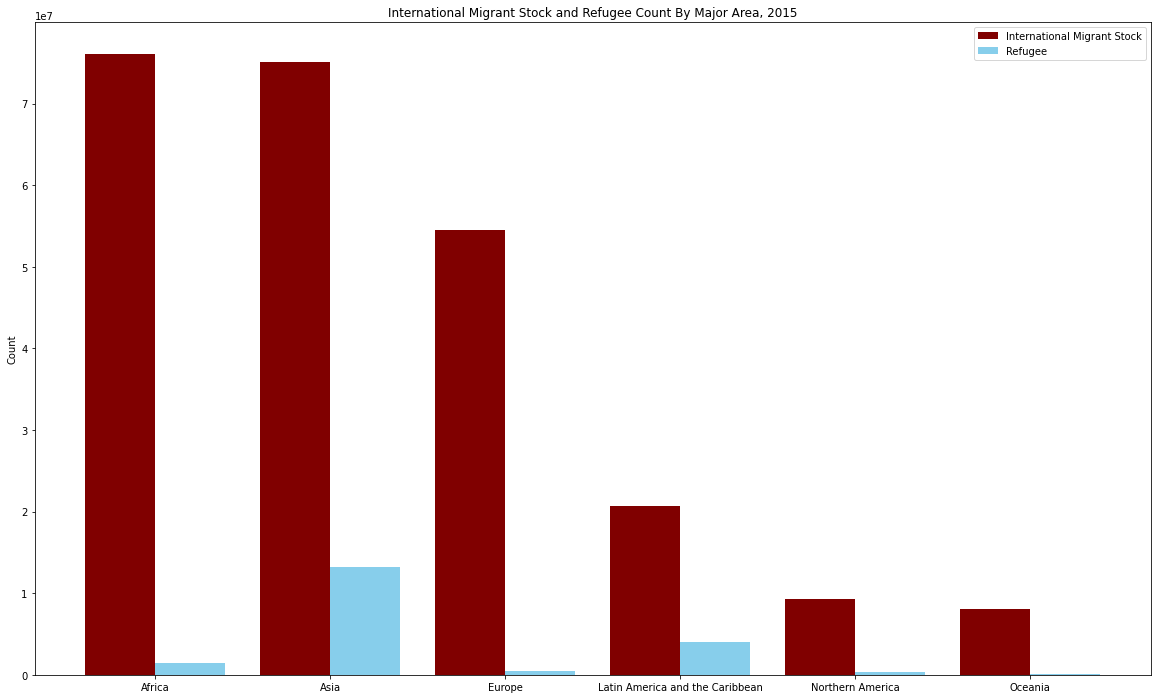

In [58]:
import matplotlib.pyplot as plt

# creating the bar plot
fig, ax = plt.subplots(figsize = (20, 12))
x = np.arange(6)

rects1 = ax.bar(x-0.2, ims_refugee_2015['ims_count'], color ='maroon', width = 0.4, label='International Migrant Stock')
rects2 = ax.bar(x+0.2, ims_refugee_2015['refugee_count'], color ='skyblue', width = 0.4, label='Refugee')

ax.set_xticks(x, ims_2015_continent['geo_definition'])
ax.set_title("Major Area")
ax.set_ylabel("Count")
ax.set_title("International Migrant Stock and Refugee Count By Major Area, 2015")
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
plt.show()


In [59]:
ims_count = pd.merge(df_table_1[(df_table_1['gender'] == 'Both') & (df_table_1['year'] == '2015')], df_table_8, how="inner",left_on=['geo_code'],right_on=['country_code']).drop_duplicates()
ims_count = pd.merge(ims_count, df_table_7, how="inner" ,left_on=['area_code'],right_on=['geo_code']).drop_duplicates()

In [60]:
import seaborn as sns

ims_count_africa = ims_count[ims_count['geo_definition'] == 'Africa']
ims_count_europe = ims_count[ims_count['geo_definition'] == 'Europe']
ims_count_asia = ims_count[ims_count['geo_definition'] == 'Asia']
ims_count_na = ims_count[ims_count['geo_definition'] == 'Northern America']
ims_count_la = ims_count[ims_count['geo_definition'] == 'Latin America and the Caribbean']

fig, axs = plt.subplots(2, 3, figsize=(20, 12))

sns.histplot(data = ims_count_africa, x = 'ims_count', label='Africa', kde=True, ax=axs[0,0]).set_title("Africa Immgration Count")
sns.histplot(data = ims_count_europe, x = 'ims_count', label='Europe', kde=True, ax=axs[0,1]).set_title("Europe Immgration Count")
sns.histplot(data = ims_count_asia, x = 'ims_count', label='Asia', kde=True, ax=axs[0,2]).set_title("Asia Immgration Count")
sns.histplot(data = ims_count_na, x = 'ims_count', label='Northern America', kde=True, ax=axs[1,0]).set_title("Northern America Immgration Count")
sns.histplot(data = ims_count_la, x = 'ims_count', label='Latin America and the Caribbean', kde=True, ax=axs[1,1]).set_title("Latin America and the Caribbean Immgration Count")

plt.show()

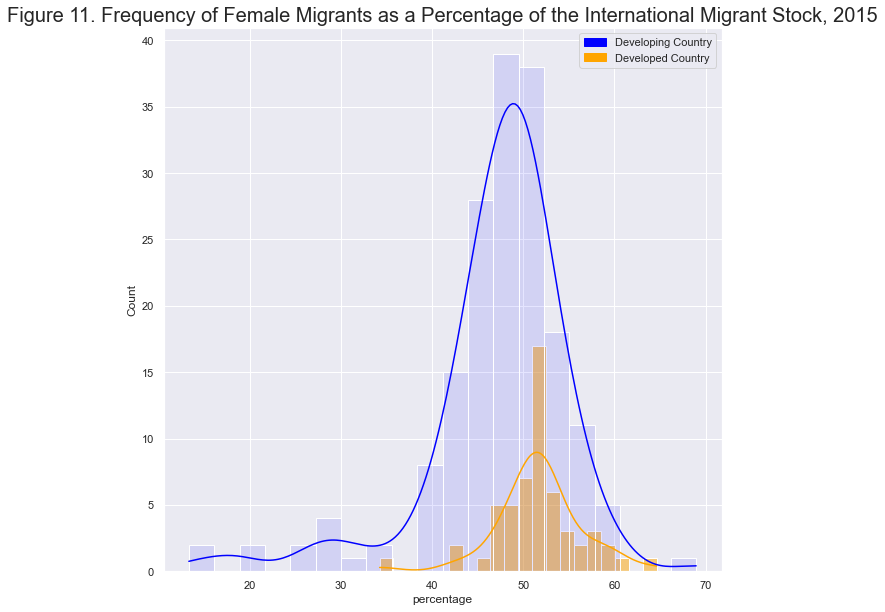

In [118]:
female_percentage = pd.merge(df_table_female_pertange[(df_table_female_pertange['year'] == '2015')], df_table_8, how="inner",left_on=['geo_code'],right_on=['country_code']).drop_duplicates()

female_percentage_developed = female_percentage[female_percentage['developed_region'] == 'Yes']
female_percentage_developing = female_percentage[female_percentage['developed_region'] == 'No']


plt.figure(figsize=(10, 10))
sns.histplot(data = female_percentage_developed, x = 'percentage', color="orange", bins=20, label='Developed Country', kde=True)
sns.histplot(data = female_percentage_developing, x = 'percentage', color="blue", alpha = 0.1, bins=20, label='Developing Country', kde=True)#.set_title("Female Migrants As A Percentage Of The International Migrant Stock in Developing Country, 2015")

red_patch = mpatches.Patch(color='blue', label='Developing Country')
blue_patch = mpatches.Patch(color='orange', label='Developed Country')
plt.legend(handles=[red_patch, blue_patch])
plt.title("Figure 11. Frequency of Female Migrants as a Percentage of the International Migrant Stock, 2015", fontsize=20)

plt.show()

In [69]:
top_20_ims = pd.merge(ims_count.sort_values(by='ims_count', ascending=False).head(20), df_table_7, how="inner" ,left_on=['country_code'],right_on=['geo_code']).drop_duplicates().sort_values(by='ims_count')
# # developed b; developing red
# colors = ["red" if i == "No" else "skyblue" for i in top_20_ims["developed_region"]]
# top_20_ims

In [67]:
# creating the bar plot
# fig = plt.figure(figsize = (12, 5))
# plt.barh(top_20_ims['geo_definition_y'], top_20_ims['ims_count'], color = colors)

# red_patch = mpatches.Patch(color='red', label='Developing Country')
# blue_patch = mpatches.Patch(color='skyblue', label='Developed Country')
# plt.legend(handles=[red_patch, blue_patch])
# plt.title("International Migrant Stock Top 20, 2015")

In [68]:
# creating the bar plot
# fig = plt.figure(figsize = (12, 5))
# plt.barh(top_20_ims_1990['geo_definition_y'], top_20_ims_1990['ims_count'], color = colors)
# red_patch = mpatches.Patch(color='red', label='Developing Country')
# blue_patch = mpatches.Patch(color='skyblue', label='Developed Country')
# plt.legend(handles=[red_patch, blue_patch])
# plt.title("International Migrant Stock Top 20, 1990")

In [71]:
refugee_count = pd.merge(df_table_3[(df_table_3['year'] == '2015')], df_table_8, how="inner",left_on=['geo_code'],right_on=['country_code']).drop_duplicates()
refugee_count = pd.merge(refugee_count, df_table_7, how="inner" ,left_on=['area_code'],right_on=['geo_code']).drop_duplicates()
top_20_refugee = pd.merge(refugee_count.sort_values(by='refugee_count', ascending=False).head(20), df_table_7, how="inner" ,left_on=['country_code'],right_on=['geo_code']).drop_duplicates().sort_values(by='refugee_count')
# colors = ["red" if i == "No" else "skyblue" for i in top_20_refugee["developed_region"]]
top_20_refugee

geo_code_x  year  refugee_count  country_code  area_code  region_code  \
19         728  2015         240673           728        903          910   
18         887  2015         241288           887        935          922   
17         250  2015         252264           250        908          926   
16         818  2015         261741           818        903          912   
15         840  2015         263662           840        905          905   
14         120  2015         264126           120        903          911   
13         368  2015         271143           368        935          922   
12           4  2015         300569             4        935         5501   
11         156  2015         301052           156        935          906   
10         800  2015         358453           800        903          910   
9          148  2015         454882           148        903          911   
8          404  2015         551352           404        903          910   
7          231  2015         659524           231        903          910   
6          760  2015         713204           760        935          922   
5          364  2015         982085           364        935         5501   
4          792  2015        1587374           792        935          922   
3          586  2015        1610355           586        935         5501   
2          422  2015        1617179           422        935          922   
1          275  2015        2051096           275        935          922   
0          400  2015        2751479           400        935          922   

   developed_region least_developed_country sub-saharan_africa  geo_code_y  \
19               No                     Yes                Yes         903   
18               No                     Yes                 No         935   
17              Yes                      No                 No         908   
16               No                      No                 No         903   
15              Yes                      No                 No         905   
14               No                      No                Yes         903   
13               No                      No                 No         935   
12               No                     Yes                 No         935   
11               No                      No                 No         935   
10               No                     Yes                Yes         903   
9                No                     Yes                Yes         903   
8                No                      No                Yes         903   
7                No                     Yes                Yes         903   
6                No                      No                 No         935   
5                No                      No                 No         935   
4                No                      No                 No         935   
3                No                      No                 No         935   
2                No                      No                 No         935   
1                No                      No                 No         935   
0                No                      No                 No         935   

    geo_definition_x  geo_code            geo_definition_y  
19            Africa       728                 South Sudan  
18              Asia       887                       Yemen  
17            Europe       250                      France  
16            Africa       818                       Egypt  
15  Northern America       840    United States of America  
14            Africa       120                    Cameroon  
13              Asia       368                        Iraq  
12              Asia         4                 Afghanistan  
11              Asia       156                       China  
10            Africa       800                      Uganda  
9             Africa       148                        Chad  
8             A

In [72]:
# creating the bar plot
# fig = plt.figure(figsize = (12, 5))
# plt.barh(top_20_refugee['geo_definition_y'], top_20_refugee['refugee_count'], color=colors)
# red_patch = mpatches.Patch(color='red', label='Developing Country')
# blue_patch = mpatches.Patch(color='skyblue', label='Developed Country')
# plt.legend(handles=[red_patch, blue_patch])
# plt.title("Refugee Stock Top 20, 2015")

In [73]:
# creating the bar plot
# fig = plt.figure(figsize = (12, 5))
# plt.barh(top_20_refugee_1990['geo_definition_y'], top_20_refugee_1990['refugee_count'], color=colors)
# red_patch = mpatches.Patch(color='red', label='Developing Country')
# blue_patch = mpatches.Patch(color='skyblue', label='Developed Country')
# plt.legend(handles=[red_patch, blue_patch])
# plt.title("Refugee Stock Top 20, 1990")

In [75]:
ims_all_year_count = pd.merge(df_table_1[(df_table_1['gender'] == 'Both')], df_table_8, how="inner",left_on=['geo_code'],right_on=['country_code']).drop_duplicates()
ims_all_year_count = pd.merge(ims_all_year_count, df_table_7, how="inner" ,left_on=['area_code'],right_on=['geo_code']).drop_duplicates()
ims_all_year_count

geo_code_x  year gender  ims_count  country_code  area_code  \
0             108  1990   Both   333110.0           108        903   
58            108  1995   Both   254853.0           108        903   
116           108  2000   Both   125628.0           108        903   
174           108  2005   Both   172874.0           108        903   
232           108  2010   Both   235259.0           108        903   
...           ...   ...    ...        ...           ...        ...   
66191         876  1995   Both     1680.0           876        909   
66214         876  2000   Both     2015.0           876        909   
66237         876  2005   Both     2365.0           876        909   
66260         876  2010   Both     2776.0           876        909   
66283         876  2015   Both     2849.0           876        909   

       region_code developed_region least_developed_country  \
0              910               No                     Yes   
58             910               No                     Yes   
116            910               No                     Yes   
174            910               No                     Yes   
232            910               No                     Yes   
...            ...              ...                     ...   
66191          957               No                      No   
66214          957               No                      No   
66237          957               No                      No   
66260          957               No                      No   
66283          957               No                      No   

      sub-saharan_africa  geo_code_y geo_definition  
0                    Yes         903         Africa  
58                   Yes         903         Africa  
116                  Yes         903         Africa  
174                  Yes         903         Africa  
232                  Yes         903         Africa  
...                  ...         ...            ...  
66191                 No         909        Oceania  
66214                 No         909        Oceania  
66237                 No         909        Oceania  
66260                 No         909        Oceania  
66283                 No         909        Oceania  

[1392 rows x 12 columns]

In [76]:
ims_1990 = ims_all_year_count[(ims_all_year_count['year'] == '1990')]
top_20_ims_1990 = pd.merge(ims_1990.sort_values(by='ims_count', ascending=False).head(20), df_table_7, how="inner" ,left_on=['country_code'],right_on=['geo_code']).drop_duplicates().sort_values(by='ims_count')
# developed b; developing red
# colors = ["red" if i == "No" else "skyblue" for i in top_20_ims_1990["developed_region"]]
top_20_ims_1990

geo_code_x  year gender   ims_count  country_code  area_code  region_code  \
19         729  1990   Both   1402896.0           729        903          912   
18         380  1990   Both   1428219.0           380        908          925   
17         376  1990   Both   1632704.0           376        935          922   
16          32  1990   Both   1649919.0            32        904          931   
15         860  1990   Both   1653000.0           860        935         5500   
14         384  1990   Both   1816426.0           384        903          914   
13         344  1990   Both   2218473.0           344        935          906   
12         398  1990   Both   3619200.0           398        935         5500   
11         826  1990   Both   3650286.0           826        908          924   
10          36  1990   Both   3955213.0            36        909          927   
9          364  1990   Both   4291601.0           364        935         5501   
8          124  1990   Both   4333318.0           124        905          905   
7          682  1990   Both   4998445.0           682        935          922   
6          250  1990   Both   5897267.0           250        908          926   
5          276  1990   Both   5936181.0           276        908          926   
4          586  1990   Both   6208204.0           586        935         5501   
3          804  1990   Both   6892920.0           804        908          923   
2          356  1990   Both   7493204.0           356        935         5501   
1          643  1990   Both  11524948.0           643        908          923   
0          840  1990   Both  23251026.0           840        905          905   

   developed_region least_developed_country sub-saharan_africa  geo_code_y  \
19               No                     Yes                Yes         903   
18              Yes                      No                 No         908   
17               No                      No                 No         935   
16               No                      No                 No         904   
15               No                      No                 No         935   
14               No                      No                Yes         903   
13               No                      No                 No         935   
12               No                      No                 No         935   
11              Yes                      No                 No         908   
10              Yes                      No                 No         909   
9                No                      No                 No         935   
8               Yes                      No                 No         905   
7                No                      No                 No         935   
6               Yes                      No                 No         908   
5               Yes                      No                 No         908   
4                No                      No                 No         935   
3               Yes                      No                 No         908   
2                No                      No                 No         935   
1               Yes                      No                 No         908   
0               Yes                      No                 No         905   

                   geo_definition_x  geo_code  \
19                           Africa       729   
18                           Europe       380   
17                             Asia       376   
16  Latin America and the Caribbean        32   
15                             Asia       860   
14                           Africa       384   
13                             Asia       344   
12                             Asia       398   
11                           Europe       826   
10                          Oceania        36   
9                              Asia       364   
8                  Northern America       124   
7                         

In [77]:
refugee_count_1990 = pd.merge(df_table_3[(df_table_3['year'] == '1990')], df_table_8, how="inner",left_on=['geo_code'],right_on=['country_code']).drop_duplicates()
refugee_count_1990 = pd.merge(refugee_count_1990, df_table_7, how="inner" ,left_on=['area_code'],right_on=['geo_code']).drop_duplicates()
top_20_refugee_1990 = pd.merge(refugee_count_1990.sort_values(by='refugee_count', ascending=False).head(20), df_table_7, how="inner" ,left_on=['country_code'],right_on=['geo_code']).drop_duplicates().sort_values(by='refugee_count')
# colors = ["red" if i == "No" else "skyblue" for i in top_20_refugee_1990["developed_region"]]
top_20_refugee_1990

geo_code_x  year  refugee_count  country_code  area_code  region_code  \
19         340  1990         237144           340        904          916   
18         834  1990         265184           834        903          910   
17         108  1990         267929           108        903          910   
16         188  1990         277505           188        904          916   
15         760  1990         282794           760        935          922   
14         156  1990         285788           156        935          906   
13         422  1990         305499           422        935          922   
12         324  1990         325000           324        903          914   
11         484  1990         356454           484        904          916   
10         180  1990         378562           180        903          911   
9          840  1990         438193           840        905          905   
8          706  1990         460000           706        903          910   
7          276  1990         722250           276        908          926   
6          231  1990         741965           231        903          910   
5          454  1990         874614           454        903          910   
4          275  1990         910637           275        935          922   
3          400  1990         929482           400        935          922   
2          729  1990        1031050           729        903          912   
1          586  1990        3265845           586        935         5501   
0          364  1990        3512201           364        935         5501   

   developed_region least_developed_country sub-saharan_africa  geo_code_y  \
19               No                      No                 No         904   
18               No                     Yes                Yes         903   
17               No                     Yes                Yes         903   
16               No                      No                 No         904   
15               No                      No                 No         935   
14               No                      No                 No         935   
13               No                      No                 No         935   
12               No                     Yes                Yes         903   
11               No                      No                 No         904   
10               No                     Yes                Yes         903   
9               Yes                      No                 No         905   
8                No                     Yes                Yes         903   
7               Yes                      No                 No         908   
6                No                     Yes                Yes         903   
5                No                     Yes                Yes         903   
4                No                      No                 No         935   
3                No                      No                 No         935   
2                No                     Yes                Yes         903   
1                No                      No                 No         935   
0                No                      No                 No         935   

                   geo_definition_x  geo_code  \
19  Latin America and the Caribbean       340   
18                           Africa       834   
17                           Africa       108   
16  Latin America and the Caribbean       188   
15                             Asia       760   
14                             Asia       156   
13                             Asia       422   
12                           Africa       324   
11  Latin America and the Caribbean       484   
10                           Africa       180   
9                  Northern America       840   
8                            Africa       706   
7                            Europe       276   
6                            Africa       231   
5           

In [78]:
pop_all_year_count = pd.merge(df_table_2[(df_table_2['gender'] == 'Both')], df_table_8, how="inner",left_on=['geo_code'],right_on=['country_code']).drop_duplicates()
pop_all_year_count = pd.merge(pop_all_year_count, df_table_7, how="inner" ,left_on=['area_code'],right_on=['geo_code']).drop_duplicates()
pop_all_year_count

geo_code_x  year gender  population  country_code  area_code  \
0             108  1990   Both   5613141.0           108        903   
58            108  1995   Both   6239030.0           108        903   
116           108  2000   Both   6767073.0           108        903   
174           108  2005   Both   7934213.0           108        903   
232           108  2010   Both   9461117.0           108        903   
...           ...   ...    ...         ...           ...        ...   
66191         876  1995   Both     14143.0           876        909   
66214         876  2000   Both     14497.0           876        909   
66237         876  2005   Both     14246.0           876        909   
66260         876  2010   Both     13565.0           876        909   
66283         876  2015   Both     13151.0           876        909   

       region_code developed_region least_developed_country  \
0              910               No                     Yes   
58             910               No                     Yes   
116            910               No                     Yes   
174            910               No                     Yes   
232            910               No                     Yes   
...            ...              ...                     ...   
66191          957               No                      No   
66214          957               No                      No   
66237          957               No                      No   
66260          957               No                      No   
66283          957               No                      No   

      sub-saharan_africa  geo_code_y geo_definition  
0                    Yes         903         Africa  
58                   Yes         903         Africa  
116                  Yes         903         Africa  
174                  Yes         903         Africa  
232                  Yes         903         Africa  
...                  ...         ...            ...  
66191                 No         909        Oceania  
66214                 No         909        Oceania  
66237                 No         909        Oceania  
66260                 No         909        Oceania  
66283                 No         909        Oceania  

[1392 rows x 12 columns]

[Text(0.5, 0, '')]

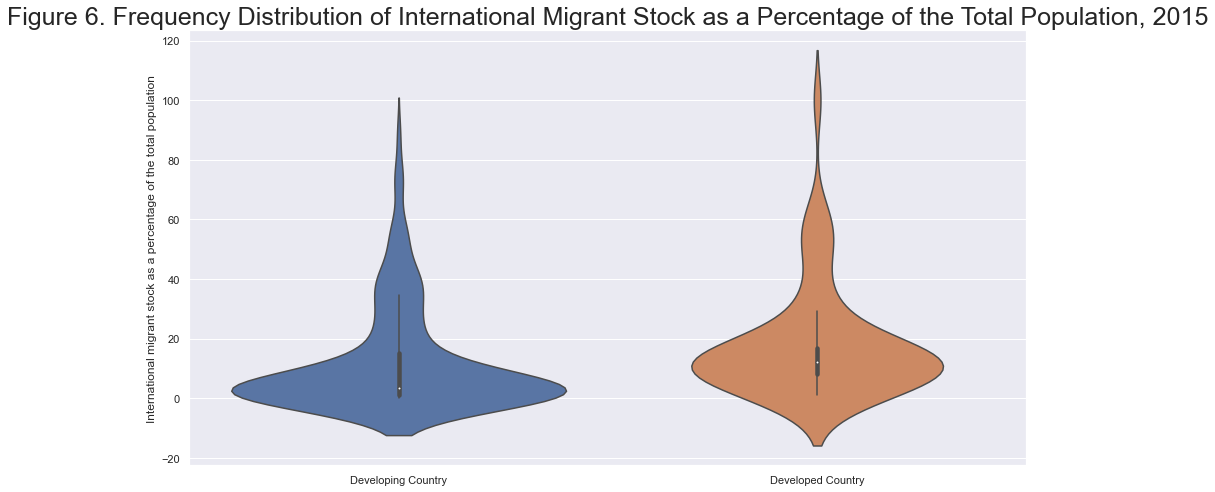

In [113]:
ims_2015_country = ims_all_year_count[(ims_all_year_count['year'] == '2015')]
pop_2015_country = pop_all_year_count[(pop_all_year_count['year'] == '2015')]
ims_pop_2015 = pd.merge(ims_2015_country,pop_2015_country, how="inner",  on=['country_code', 'year'])[["country_code", "year", "ims_count", "population", "developed_region_x"]]
ims_pop_2015["ims/pop"] = 100*ims_pop_2015["ims_count"]/ims_pop_2015["population"]
ims_pop_2015["developed_region"] = ims_pop_2015['developed_region_x'].apply(lambda x: 'Developed Country' if x == "Yes" else 'Developing Country')
ims_pop_2015
# plot
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.violinplot(x=ims_pop_2015["developed_region"], y=ims_pop_2015["ims/pop"])
ax.set(ylabel="International migrant stock as a percentage of the total population")
ax.set_title('Figure 6. Frequency Distribution of International Migrant Stock as a Percentage of the Total Population, 2015', fontsize = 25)
ax.set(xlabel=None)


In [111]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x=ims_pop_2015["developed_region"], y=ims_pop_2015["ims/pop"], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax.set(ylabel="International migrant stock as a percentage of the total population")
ax.set_title('Figure 5. International Migrant Stock as a Percentage of the Total Population, 2015', fontsize = 25)
ax.set(xlabel=None)

[Text(0.5, 0, '')]

In [84]:
#refugee_count
ims_pop_refugee_2015 = pd.merge(ims_pop_2015, refugee_count[['country_code', 'year', 'refugee_count', "region_code", "area_code"]], how="inner", on=['country_code', 'year'])[["country_code", "year","ims/pop", "ims_count", "population", "refugee_count", "developed_region", "region_code", "area_code"]]
ims_pop_refugee_2015["refugee/ims"] = 100*ims_pop_refugee_2015["refugee_count"]/ims_pop_refugee_2015["ims_count"]

[Text(0.5, 0, '')]

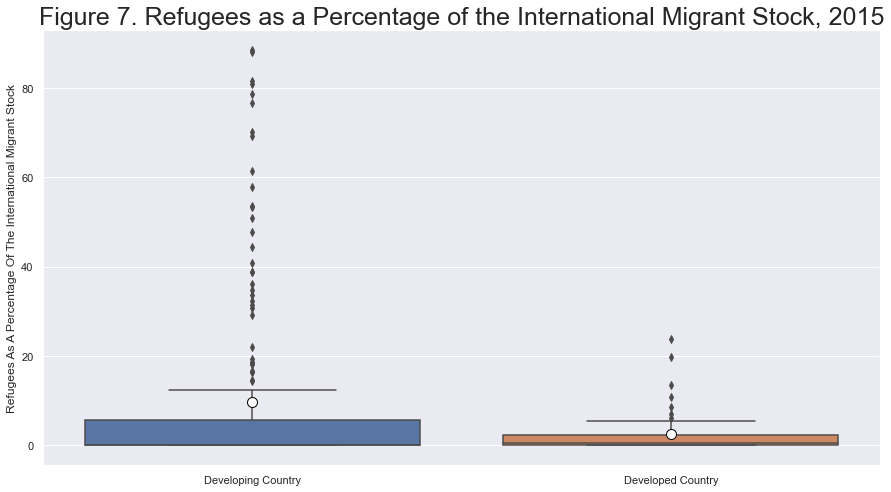

In [114]:
ims_pop_refugee_2015_exclu = ims_pop_refugee_2015[ims_pop_refugee_2015["refugee/ims"] < 800]
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x=ims_pop_refugee_2015_exclu["developed_region"], y=ims_pop_refugee_2015_exclu["refugee/ims"], showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax.set(ylabel="Refugees As A Percentage Of The International Migrant Stock")
ax.set_title('Figure 7. Refugees as a Percentage of the International Migrant Stock, 2015', fontsize = 25)
ax.set(xlabel=None)

[Text(0.5, 0, '')]

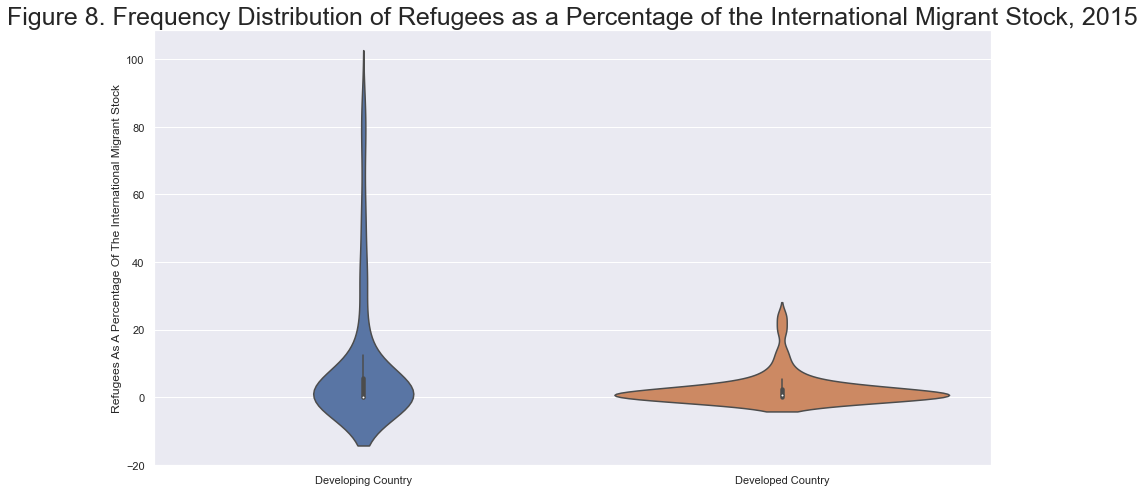

In [115]:
# plot
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.violinplot(x=ims_pop_refugee_2015_exclu["developed_region"], y=ims_pop_refugee_2015_exclu["refugee/ims"])
ax.set(ylabel="Refugees As A Percentage Of The International Migrant Stock")
ax.set_title('Figure 8. Frequency Distribution of Refugees as a Percentage of the International Migrant Stock, 2015', fontsize = 25)
ax.set(xlabel=None)

Text(0.5, 1.0, 'Figure 3. International Migrant Stock as a Percentage of the Total Population vs International Migrant Stock, 2015')

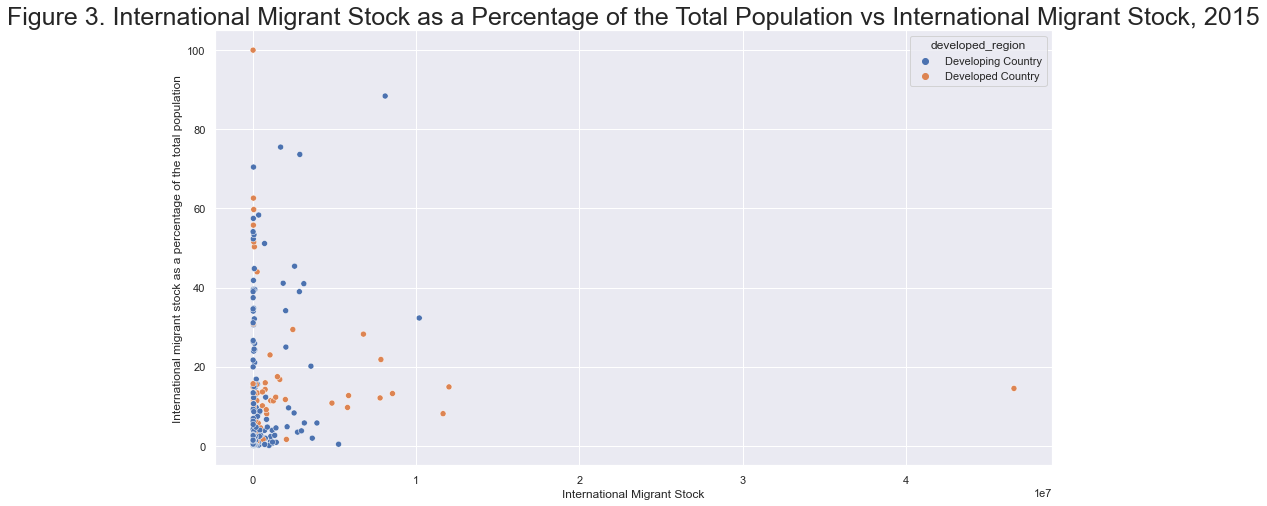

In [109]:
ax = sns.scatterplot(data=ims_pop_refugee_2015, x="ims_count", y="ims/pop", hue="developed_region")
ax.set(xlabel="International Migrant Stock", ylabel="International migrant stock as a percentage of the total population")
ax.set_title('Figure 3. International Migrant Stock as a Percentage of the Total Population vs International Migrant Stock, 2015', fontsize = 25)

Text(0.5, 1.0, 'Figure 4. Refugees as a Percentage of the International Migrant Stock vs Refugee Stock, 2015')

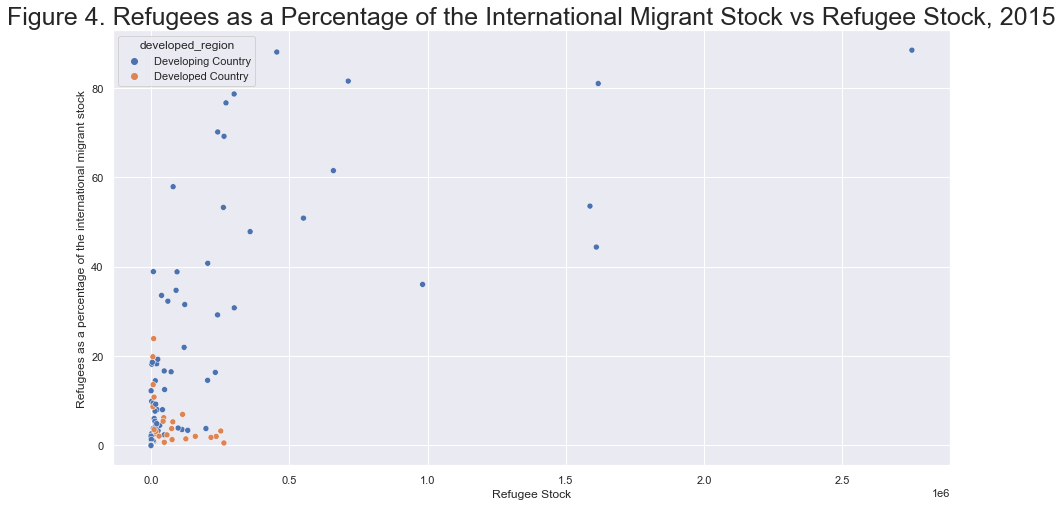

In [110]:
ax = sns.scatterplot(data=ims_pop_refugee_2015_exclu, x="refugee_count", y="refugee/ims", hue="developed_region")
ax.set(xlabel="Refugee Stock", ylabel="Refugees as a percentage of the international migrant stock")
ax.set_title('Figure 4. Refugees as a Percentage of the International Migrant Stock vs Refugee Stock, 2015', fontsize = 25)

In [120]:
#df_acr[(df_acr['geo_code'] == 901) | ((df_acr['geo_code'] == 902))]
# multiple line plots

plt.plot('year', 'rate_of_change', data=df_acr[(df_acr['geo_code'] == 901) & ((df_acr['gender'] == "Male"))], marker='o', markerfacecolor='black', markersize=12, color='skyblue', linewidth=4, label = "Developed-Male")
plt.plot('year', 'rate_of_change', data=df_acr[(df_acr['geo_code'] == 901) & ((df_acr['gender'] == "Female"))], marker='o', markerfacecolor='black', markersize=12, color='red', linewidth=4, label = "Developed-Female")
plt.plot('year', 'rate_of_change', data=df_acr[(df_acr['geo_code'] == 901) & ((df_acr['gender'] == "Both"))], marker='o', markerfacecolor='black', markersize=12, color='pink', linewidth=4, label = "Developed-All")
plt.plot('year', 'rate_of_change', data=df_acr[(df_acr['geo_code'] == 902) & ((df_acr['gender'] == "Male"))], marker='o', markerfacecolor='black', markersize=12, color='orange', linewidth=4, label = "Developing-Male")
plt.plot('year', 'rate_of_change', data=df_acr[(df_acr['geo_code'] == 902) & ((df_acr['gender'] == "Female"))], marker='o', markerfacecolor='black', markersize=12, color='green', linewidth=4, label = "Developing-Female")
plt.plot('year', 'rate_of_change', data=df_acr[(df_acr['geo_code'] == 902) & ((df_acr['gender'] == "Both"))], marker='o', markerfacecolor='black', markersize=12, color='purple', linewidth=4, label = "Developing-All")

# show legend
plt.legend()
plt.title("Figure 12. Annual Rate of Change of the Migrant Stock by Gender", fontsize = 25)
plt.xlabel("Year")
plt.ylabel("Percentage")

# show graph
plt.show()

In [107]:
#df_acr[(df_acr['geo_code'] == 901) | ((df_acr['geo_code'] == 902))]
# multiple line plots

plt.plot('year', 'ims_count', data=df_table_1[(df_table_1['geo_code'] == 900) & ((df_table_1['gender'] == "Both"))], marker='o', markerfacecolor='black', markersize=12, color='black', linewidth=4, label = "World")
plt.plot('year', 'ims_count', data=df_table_1[(df_table_1['geo_code'] == 901) & ((df_table_1['gender'] == "Both"))], marker='o', markerfacecolor='black', markersize=12, color='orange', linewidth=4, label = "Developed Country")
plt.plot('year', 'ims_count', data=df_table_1[(df_table_1['geo_code'] == 902) & ((df_table_1['gender'] == "Both"))], marker='o', markerfacecolor='black', markersize=12, color='skyblue', linewidth=4, label = "Developing Country")

# show legend
plt.legend()
plt.title("Figure 1. International Migrant Stock, 1990-2015", fontsize = 25)
plt.xlabel("Year")
plt.ylabel("Count")
# show graph
plt.show()

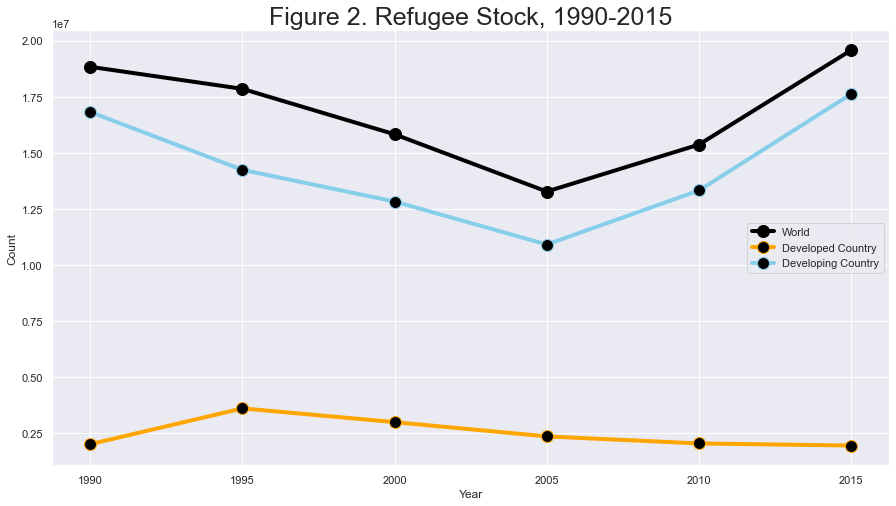

In [108]:
plt.plot('year', 'refugee_count', data=df_table_3[(df_table_3['geo_code'] == 900)], marker='o', markerfacecolor='black', markersize=12, color='black', linewidth=4, label = "World")
plt.plot('year', 'refugee_count', data=df_table_3[(df_table_3['geo_code'] == 901)], marker='o', markerfacecolor='black', markersize=12, color='orange', linewidth=4, label = "Developed Country")
plt.plot('year', 'refugee_count', data=df_table_3[(df_table_3['geo_code'] == 902)], marker='o', markerfacecolor='black', markersize=12, color='skyblue', linewidth=4, label = "Developing Country")

# show legend
plt.legend()
plt.title("Figure 2. Refugee Stock, 1990-2015", fontsize = 25)
plt.xlabel("Year")
plt.ylabel("Count")
# show graph
plt.show()

In [90]:
refugee_allyear_count = pd.merge(df_table_3, df_table_8, how="inner",left_on=['geo_code'],right_on=['country_code']).drop_duplicates()
refugee_allyear_count = pd.merge(refugee_allyear_count, df_table_7, how="inner" ,left_on=['area_code'],right_on=['geo_code']).drop_duplicates()
# refugee_groupby_develop_year = refugee_allyear_count.groupby(['developed_region','year'], as_index = False).sum("refugee_count")

In [91]:
# Transform Gender column, if male in the field return male otherwise return female
def regionConvert(developed_region_x, developed_region_y):
    if developed_region_x:
        return "Developed Country" if developed_region_x == "Yes" else "Developing Country"
    else:
        return "Developed Country" if developed_region_y == "Yes" else "Developing Country"

In [92]:
modified_2015 = top_20_ims[["ims_count", "geo_definition_y", "developed_region"]].rename(columns={"ims_count": "2015_ims", "geo_definition_y": "country"})
modified_1990 = top_20_ims_1990[["ims_count", "geo_definition_y", "developed_region"]].rename(columns={"ims_count": "1990_ims", "geo_definition_y": "country"})
modified_2015["rank_2015"] = modified_2015.index + 1
modified_1990["rank_1990"] = modified_1990.index + 1
modified_2015 = modified_2015[modified_2015["rank_2015"] <= 10]
modified_1990 = modified_1990[modified_1990["rank_1990"] <= 10]
merged = pd.merge(modified_2015, modified_1990, on='country', how='outer')
# merged = merged.astype({'rank_2015': 'Int64', 'rank_1990': 'Int64'})
merged["developed_region"] = merged.apply(lambda x: regionConvert(x['developed_region_x'], x['developed_region_y']), axis=1)
merged = merged.drop(["developed_region_x", "developed_region_y"],axis=1)
merged

2015_ims                                            country  rank_2015  \
0    5852953.0                                              Spain       10.0   
1    6763663.0                                          Australia        9.0   
2    7784418.0                                             France        8.0   
3    7835502.0                                             Canada        7.0   
4    8095126.0                               United Arab Emirates        6.0   
5    8543120.0  United Kingdom of Great Britain and Northern I...        5.0   
6   10185945.0                                       Saudi Arabia        4.0   
7   11643276.0                                 Russian Federation        3.0   
8   12005690.0                                            Germany        2.0   
9   46627102.0                           United States of America        1.0   
10         NaN                         Iran (Islamic Republic of)        NaN   
11         NaN                                           Pakistan        NaN   
12         NaN                                            Ukraine        NaN   
13         NaN                                              India        NaN   

      1990_ims  rank_1990    developed_region  
0          NaN        NaN   Developed Country  
1          NaN        NaN   Developed Country  
2    5897267.0        7.0   Developed Country  
3    4333318.0        9.0   Developed Country  
4          NaN        NaN  Developing Country  
5          NaN        NaN   Developed Country  
6    4998445.0        8.0  Developing Country  
7   11524948.0        2.0   Developed Country  
8    5936181.0        6.0   Developed Country  
9   23251026.0        1.0   Developed Country  
10   4291601.0       10.0  Developing Country  
11   6208204.0        5.0  Developing Country  
12   6892920.0        4.0  Developing Country  
13   7493204.0        3.0  Developing Country

In [116]:
# Text colors
black1 = '#252525'
black2 = '#222222'

# Gallery Plot

(ggplot(merged)
 # Slight modifications for the original lines,
 # 1. Nudge the text to either sides of the points
 # 2. Alter the color and alpha values
 + geom_text(aes(1, 'rank_1990', label='country'), nudge_x=-0.05, ha='right', size=7, color=black1)
 + geom_text(aes(2, 'rank_2015', label='country'), nudge_x=0.05, ha='left', size=7, color=black1)
 + geom_point(aes(1, 'rank_1990', color='developed_region'), size=2.5, alpha=.7)
 + geom_point(aes(2, 'rank_2015', color='developed_region'), size=2.5, alpha=.7)
 + geom_segment(aes(x=1, y='rank_1990', xend=2, yend='rank_2015', color='developed_region'), alpha=.7)
 + ggtitle("Figure 9. Top 10 Countries by International Migrant Stock Rank from 1990 to 2015 ")
 # Text Annotations
 + annotate('text', x=1, y=0, label='Rank in 1990', fontweight='bold', ha='right', size=10, color=black2)
 + annotate('text', x=2, y=0, label='Rank in 2015', fontweight='bold', ha='left', size=10, color=black2)
 + annotate('text', x=1.5, y=0, label='Lines show change in rank', size=9, color=black1)
 + lims(x=(0.35, 2.65))
 + labs(color='developed_region')
 # Countries with lower rates on top
 + scale_y_reverse()
 # Change colors
 + scale_color_brewer(type='qual', palette=2)
 # Removes all decorations
 + theme_void()
 # Changing the figure size prevents the country names from squishing up
 + theme(figure_size=(20, 8))
)

C:\Users\Shaozhu\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_text : Removed 4 rows containing missing values.
C:\Users\Shaozhu\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 4 rows containing missing values.
C:\Users\Shaozhu\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_segment : Removed 8 rows containing missing values.


<ggplot: (-9223371839114218016)>

In [96]:
modified_refugee_2015 = top_20_refugee[["refugee_count", "geo_definition_y", "developed_region"]].rename(columns={"refugee_count": "2015_refugee", "geo_definition_y": "country"})
modified_refugee_1990 = top_20_refugee_1990[["refugee_count", "geo_definition_y", "developed_region"]].rename(columns={"refugee_count": "1990_refugee", "geo_definition_y": "country"})
modified_refugee_2015["rank_2015"] = modified_refugee_2015.index + 1
modified_refugee_1990["rank_1990"] = modified_refugee_1990.index + 1
modified_refugee_2015 = modified_refugee_2015[modified_refugee_2015["rank_2015"] <= 10]
modified_refugee_1990 = modified_refugee_1990[modified_refugee_1990["rank_1990"] <= 10]
merged_refugee = pd.merge(modified_refugee_2015, modified_refugee_1990, on='country', how='outer')

merged_refugee["developed_region"] = merged_refugee.apply(lambda x: regionConvert(x['developed_region_x'], x['developed_region_y']), axis=1)
merged_refugee = merged_refugee.drop(["developed_region_x", "developed_region_y"],axis=1)
merged_refugee

2015_refugee                     country  rank_2015  1990_refugee  \
0       454882.0                        Chad       10.0           NaN   
1       551352.0                       Kenya        9.0           NaN   
2       659524.0                    Ethiopia        8.0      741965.0   
3       713204.0        Syrian Arab Republic        7.0           NaN   
4       982085.0  Iran (Islamic Republic of)        6.0     3512201.0   
5      1587374.0                      Turkey        5.0           NaN   
6      1610355.0                    Pakistan        4.0     3265845.0   
7      1617179.0                     Lebanon        3.0           NaN   
8      2051096.0          State of Palestine        2.0      910637.0   
9      2751479.0                      Jordan        1.0      929482.0   
10           NaN    United States of America        NaN      438193.0   
11           NaN                     Somalia        NaN      460000.0   
12           NaN                     Germany        NaN      722250.0   
13           NaN                      Malawi        NaN      874614.0   
14           NaN                       Sudan        NaN     1031050.0   

    rank_1990    developed_region  
0         NaN  Developing Country  
1         NaN  Developing Country  
2         7.0  Developing Country  
3         NaN  Developing Country  
4         1.0  Developing Country  
5         NaN  Developing Country  
6         2.0  Developing Country  
7         NaN  Developing Country  
8         5.0  Developing Country  
9         4.0  Developing Country  
10       10.0  Developing Country  
11        9.0  Developing Country  
12        8.0  Developing Country  
13        6.0  Developing Country  
14        3.0  Developing Country

C:\Users\Shaozhu\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_text : Removed 5 rows containing missing values.
C:\Users\Shaozhu\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 5 rows containing missing values.
C:\Users\Shaozhu\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_segment : Removed 10 rows containing missing values.


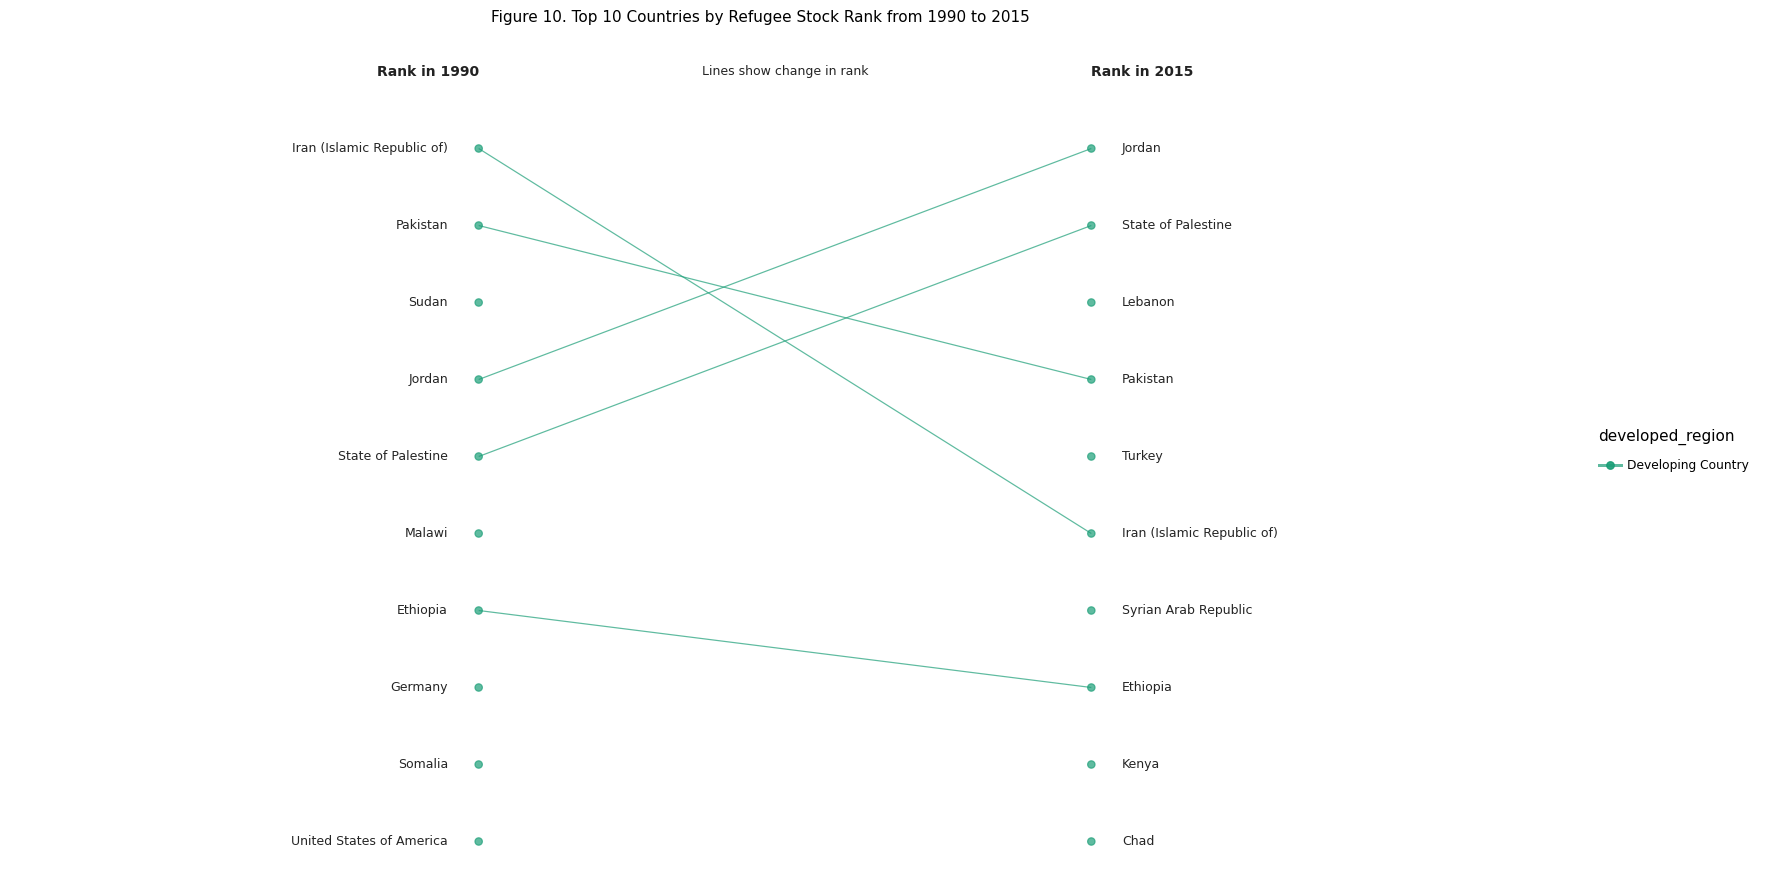

<ggplot: (-9223371839115575380)>

In [117]:
# Text colors
black1 = '#252525'
black2 = '#222222'

# Gallery Plot

(ggplot(merged_refugee)
 # Slight modifications for the original lines,
 # 1. Nudge the text to either sides of the points
 # 2. Alter the color and alpha values
 + geom_text(aes(1, 'rank_1990', label='country'), nudge_x=-0.05, ha='right', size=9, color=black1)
 + geom_text(aes(2, 'rank_2015', label='country'), nudge_x=0.05, ha='left', size=9, color=black1)
 + geom_point(aes(1, 'rank_1990', color='developed_region'), size=2.5, alpha=.7)
 + geom_point(aes(2, 'rank_2015', color='developed_region'), size=2.5, alpha=.7)
 + geom_segment(aes(x=1, y='rank_1990', xend=2, yend='rank_2015', color='developed_region'), alpha=.7)
 + ggtitle("Figure 10. Top 10 Countries by Refugee Stock Rank from 1990 to 2015")
 # Text Annotations
 + annotate('text', x=1, y=0, label='Rank in 1990', fontweight='bold', ha='right', size=10, color=black2)
 + annotate('text', x=2, y=0, label='Rank in 2015', fontweight='bold', ha='left', size=10, color=black2)
 + annotate('text', x=1.5, y=0, label='Lines show change in rank', size=9, color=black1)
 + lims(x=(0.35, 2.65))
 + labs(color='developed_region')
 # Countries with lower rates on top
 + scale_y_reverse()
 # Change colors
 + scale_color_brewer(type='qual', palette=2)
 # Removes all decorations
 + theme_void()
 # Changing the figure size prevents the country names from squishing up
 + theme(figure_size=(20, 11))
)